# Educational Process Mining

https://archive-beta.ics.uci.edu/dataset/346/educational+process+mining+epm+a+learning+analytics+data+set

Educational Process Mining (EPM): A Learning Analytics Data Set. (2015). UCI Machine Learning Repository.

## Logistic regression to model intermediate scores as pass/fail event

This notebook includes Logistic Regression to model passing the intermediate evaluations.

In [1]:
select_sess = 3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [4]:
from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score

In [5]:
from patsy import dmatrices

from numpy import arange

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from scipy.cluster import hierarchy

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import ElasticNet

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV

In [6]:
import time

## Include functions
CMPINF2120_EPM_FUNC_INCL_Over_Lisa.ipynb includes functions used in this notebook.

In [7]:
%run CMPINF2120_EPM_FUNC_INCL_Over_Lisa.ipynb

## Load the data from github repository

In [8]:
interim_sqrt_path = 'https://raw.githubusercontent.com/lisaover/CMPINF2120_project/main/tp_sqrt_inputs_interim_df.csv'

In [9]:
interim_sqrt_init = pd.read_csv(interim_sqrt_path)

In [10]:
interim_sqrt_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 83 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sess                 3642 non-null   int64  
 1   sid                  3642 non-null   int64  
 2   actv_grp             3642 non-null   object 
 3   total_ms_tp000_sqrt  3642 non-null   float64
 4   mw_tp000_sqrt        3642 non-null   float64
 5   mwc_tp000_sqrt       3642 non-null   float64
 6   mcl_tp000_sqrt       3642 non-null   float64
 7   mcr_tp000_sqrt       3642 non-null   float64
 8   mm_tp000_sqrt        3642 non-null   float64
 9   ks_tp000_sqrt        3642 non-null   float64
 10  total_ms_tp010_sqrt  3642 non-null   float64
 11  mw_tp010_sqrt        3642 non-null   float64
 12  mwc_tp010_sqrt       3642 non-null   float64
 13  mcl_tp010_sqrt       3642 non-null   float64
 14  mcr_tp010_sqrt       3642 non-null   float64
 15  mm_tp010_sqrt        3642 non-null   f

In [11]:
interim_sqrt_init.isna().sum()

sess                   0
sid                    0
actv_grp               0
total_ms_tp000_sqrt    0
mw_tp000_sqrt          0
                      ..
mm_tp100_sqrt          0
ks_tp100_sqrt          0
interim_scr            0
max_interim_scr        0
interim_pass           0
Length: 83, dtype: int64

interim_sqrt_init['sid'] = interim_sqrt_init['sid'].astype('object')
interim_sqrt_init['sess'] = interim_sqrt_init['sess'].astype('object')

In [12]:
interim_sqrt_df = interim_sqrt_init.copy()

In [13]:
sqrt_vars = get_var_list(interim_sqrt_df,['sqrt'])

In [14]:
totl_vars = get_var_list_b(interim_sqrt_df,['total'])
mw_vars = get_var_list_b(interim_sqrt_df,['mw_'])
mwc_vars = get_var_list_b(interim_sqrt_df,['mwc'])
mcl_vars = get_var_list_b(interim_sqrt_df,['mcl'])
mcr_vars = get_var_list_b(interim_sqrt_df,['mcr'])
mm_vars = get_var_list_b(interim_sqrt_df,['mm'])
ks_vars = get_var_list_b(interim_sqrt_df,['ks'])

In [15]:
features_df = interim_sqrt_df.loc[:, sqrt_vars].copy()

In [16]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_ms_tp000_sqrt  3642 non-null   float64
 1   mw_tp000_sqrt        3642 non-null   float64
 2   mwc_tp000_sqrt       3642 non-null   float64
 3   mcl_tp000_sqrt       3642 non-null   float64
 4   mcr_tp000_sqrt       3642 non-null   float64
 5   mm_tp000_sqrt        3642 non-null   float64
 6   ks_tp000_sqrt        3642 non-null   float64
 7   total_ms_tp010_sqrt  3642 non-null   float64
 8   mw_tp010_sqrt        3642 non-null   float64
 9   mwc_tp010_sqrt       3642 non-null   float64
 10  mcl_tp010_sqrt       3642 non-null   float64
 11  mcr_tp010_sqrt       3642 non-null   float64
 12  mm_tp010_sqrt        3642 non-null   float64
 13  ks_tp010_sqrt        3642 non-null   float64
 14  total_ms_tp020_sqrt  3642 non-null   float64
 15  mw_tp020_sqrt        3642 non-null   f

In [17]:
feature_names = features_df.columns

In [18]:
len(feature_names)

77

## Visualizations

In [19]:
interim_sqrt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 83 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sess                 3642 non-null   int64  
 1   sid                  3642 non-null   int64  
 2   actv_grp             3642 non-null   object 
 3   total_ms_tp000_sqrt  3642 non-null   float64
 4   mw_tp000_sqrt        3642 non-null   float64
 5   mwc_tp000_sqrt       3642 non-null   float64
 6   mcl_tp000_sqrt       3642 non-null   float64
 7   mcr_tp000_sqrt       3642 non-null   float64
 8   mm_tp000_sqrt        3642 non-null   float64
 9   ks_tp000_sqrt        3642 non-null   float64
 10  total_ms_tp010_sqrt  3642 non-null   float64
 11  mw_tp010_sqrt        3642 non-null   float64
 12  mwc_tp010_sqrt       3642 non-null   float64
 13  mcl_tp010_sqrt       3642 non-null   float64
 14  mcr_tp010_sqrt       3642 non-null   float64
 15  mm_tp010_sqrt        3642 non-null   f

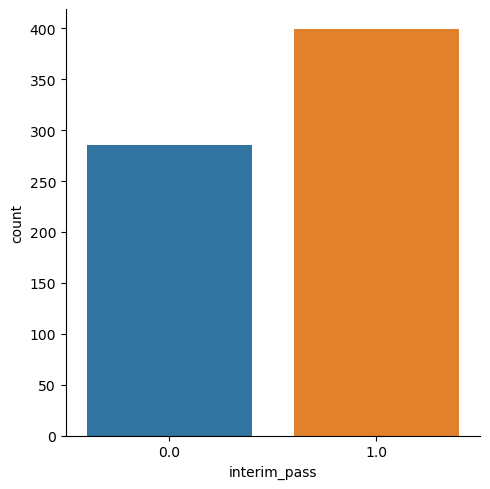

In [20]:
sns.catplot(data = interim_sqrt_df.loc[interim_sqrt_df['sess']==select_sess], x='interim_pass', kind='count')

plt.show()

## Cluster Analysis

In [21]:
select_sess_df = interim_sqrt_df.loc[interim_sqrt_df['sess']==select_sess].drop(columns=['interim_scr','max_interim_scr']).copy()

In [22]:
select_sess_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 653 to 1336
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sess                 684 non-null    int64  
 1   sid                  684 non-null    int64  
 2   actv_grp             684 non-null    object 
 3   total_ms_tp000_sqrt  684 non-null    float64
 4   mw_tp000_sqrt        684 non-null    float64
 5   mwc_tp000_sqrt       684 non-null    float64
 6   mcl_tp000_sqrt       684 non-null    float64
 7   mcr_tp000_sqrt       684 non-null    float64
 8   mm_tp000_sqrt        684 non-null    float64
 9   ks_tp000_sqrt        684 non-null    float64
 10  total_ms_tp010_sqrt  684 non-null    float64
 11  mw_tp010_sqrt        684 non-null    float64
 12  mwc_tp010_sqrt       684 non-null    float64
 13  mcl_tp010_sqrt       684 non-null    float64
 14  mcr_tp010_sqrt       684 non-null    float64
 15  mm_tp010_sqrt        684 non-null    

In [23]:
select_sess_df.isna().sum()

sess                   0
sid                    0
actv_grp               0
total_ms_tp000_sqrt    0
mw_tp000_sqrt          0
                      ..
mcl_tp100_sqrt         0
mcr_tp100_sqrt         0
mm_tp100_sqrt          0
ks_tp100_sqrt          0
interim_pass           0
Length: 81, dtype: int64

In [24]:
features_df = select_sess_df.loc[:, sqrt_vars].copy()

In [25]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 653 to 1336
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_ms_tp000_sqrt  684 non-null    float64
 1   mw_tp000_sqrt        684 non-null    float64
 2   mwc_tp000_sqrt       684 non-null    float64
 3   mcl_tp000_sqrt       684 non-null    float64
 4   mcr_tp000_sqrt       684 non-null    float64
 5   mm_tp000_sqrt        684 non-null    float64
 6   ks_tp000_sqrt        684 non-null    float64
 7   total_ms_tp010_sqrt  684 non-null    float64
 8   mw_tp010_sqrt        684 non-null    float64
 9   mwc_tp010_sqrt       684 non-null    float64
 10  mcl_tp010_sqrt       684 non-null    float64
 11  mcr_tp010_sqrt       684 non-null    float64
 12  mm_tp010_sqrt        684 non-null    float64
 13  ks_tp010_sqrt        684 non-null    float64
 14  total_ms_tp020_sqrt  684 non-null    float64
 15  mw_tp020_sqrt        684 non-null    

In [26]:
feature_names = features_df.columns

In [27]:
len(feature_names)

77

##### Bar chart shows the inputs have different scales

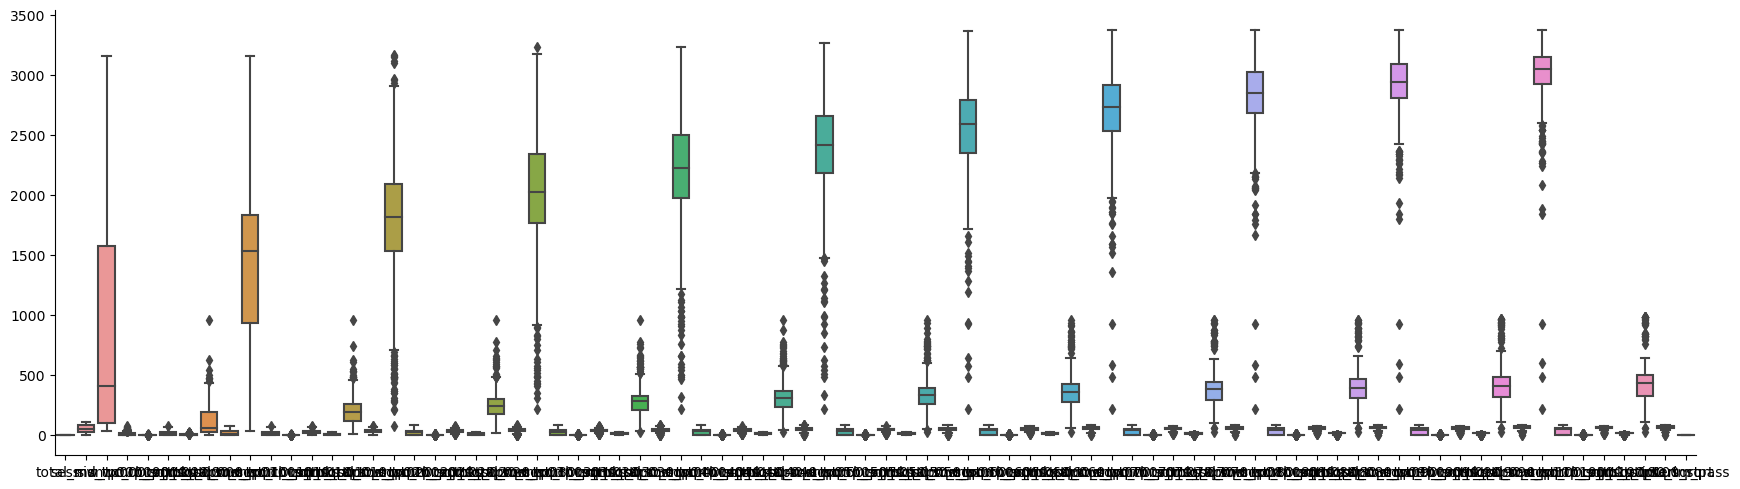

In [28]:
sns.catplot(data = select_sess_df, kind='box', aspect=3.5)

plt.show()

##### Correlation plot shows the inputs are highly correlated

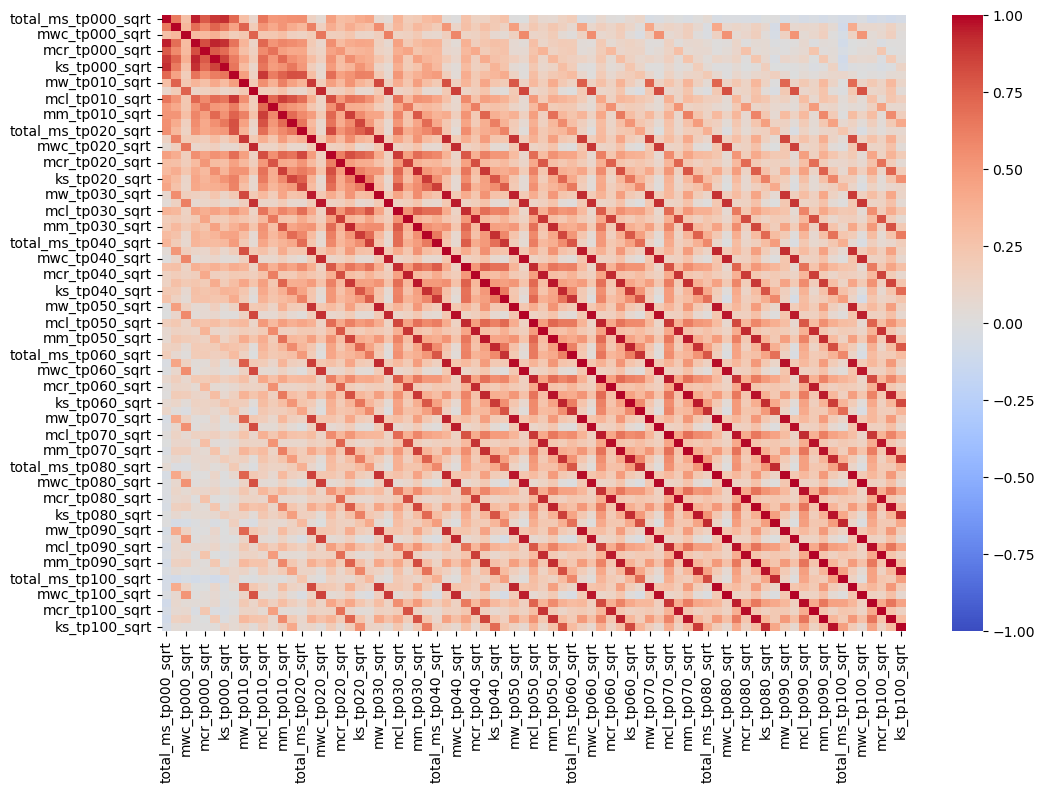

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(data = select_sess_df[feature_names].corr(), 
            vmin=-1, vmax=1, center = 0,
            cmap='coolwarm', 
            ax=ax)

plt.show()

### PCA

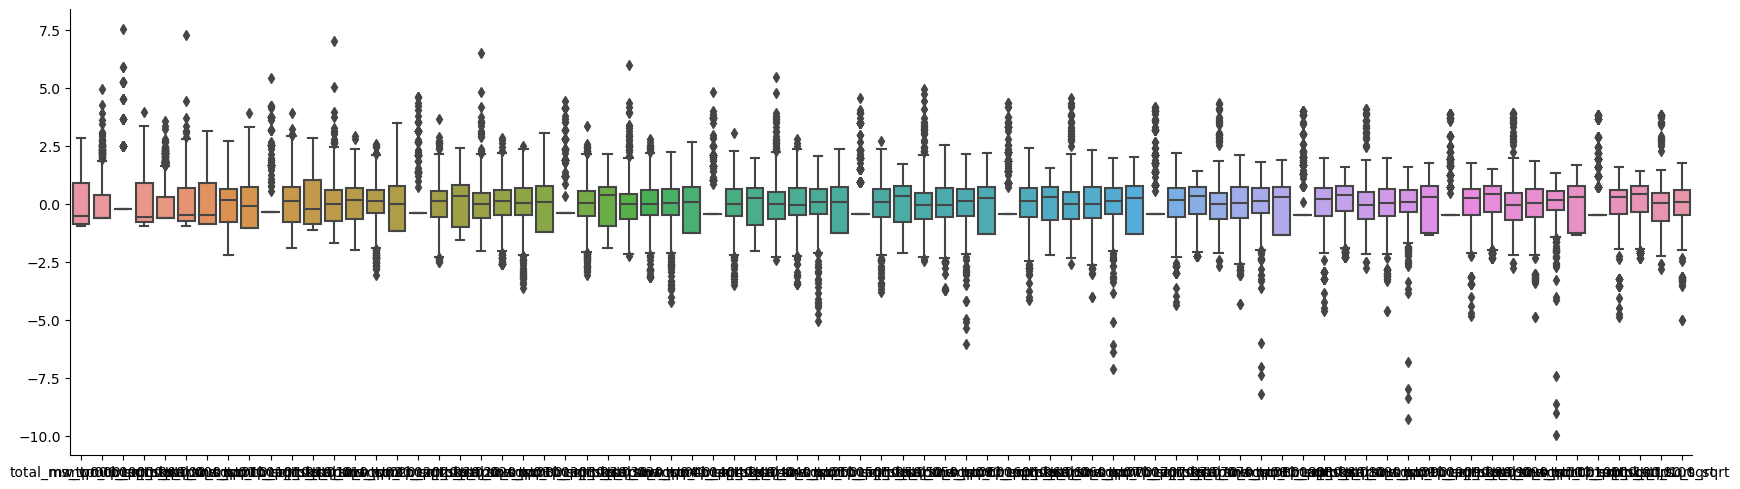

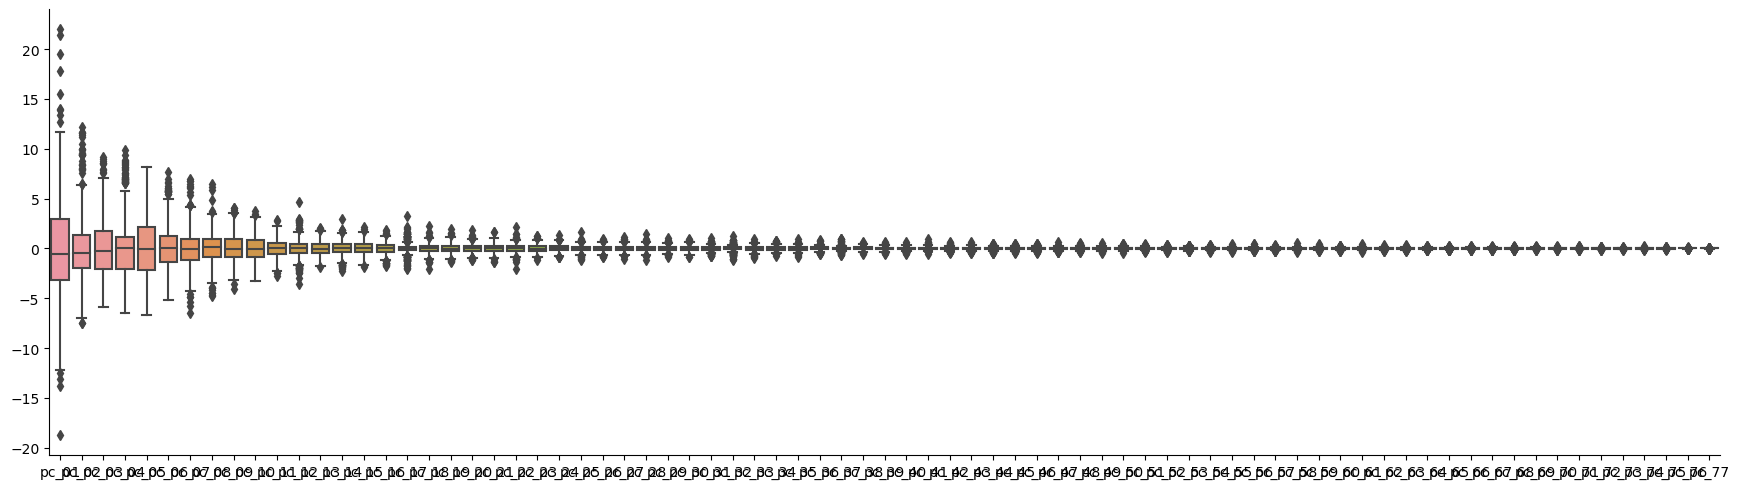

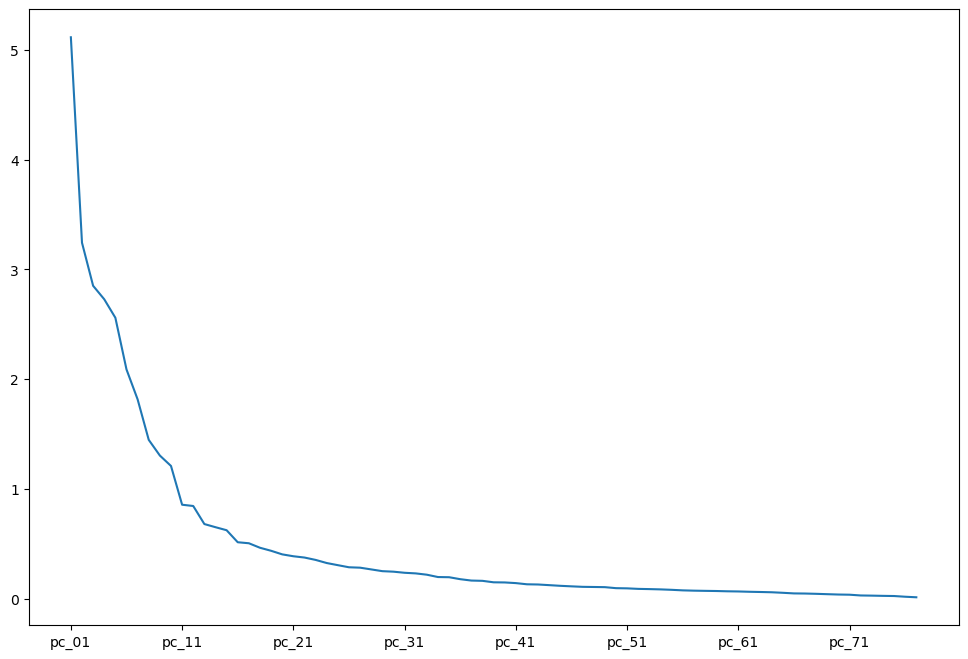

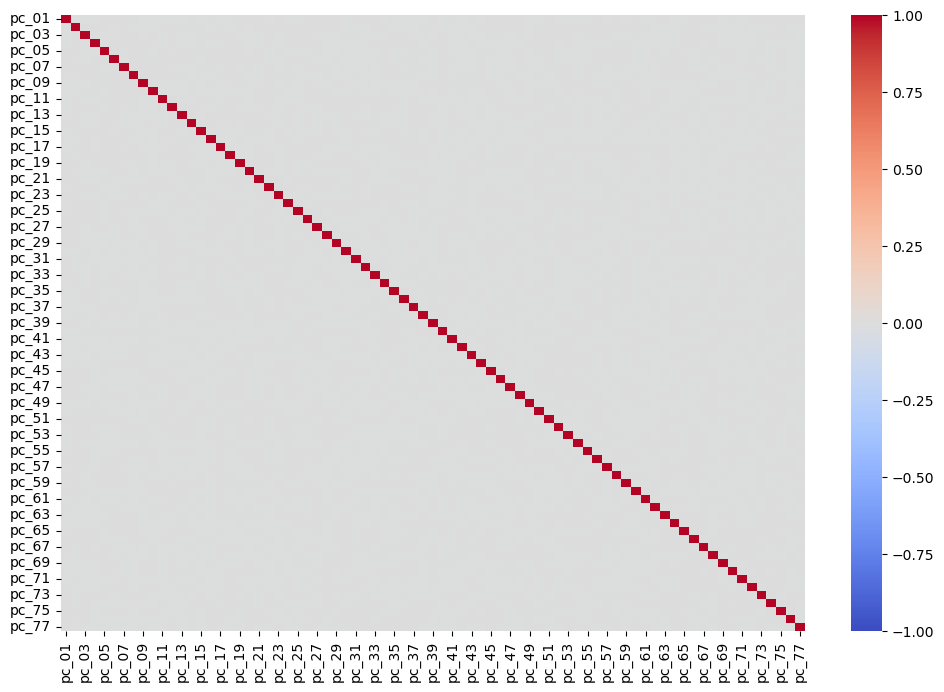

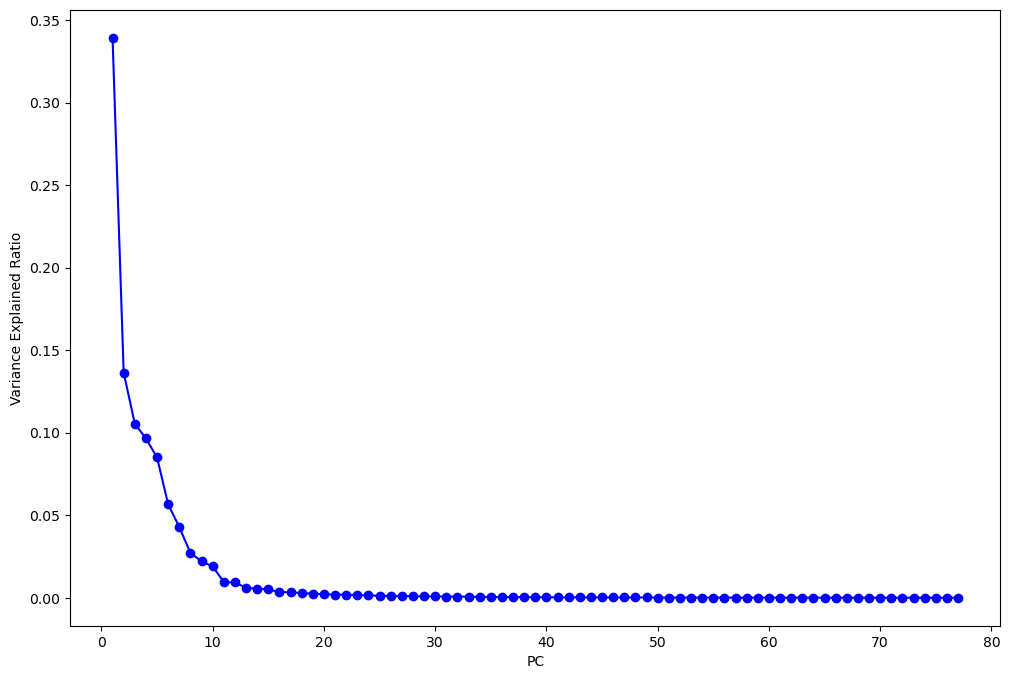

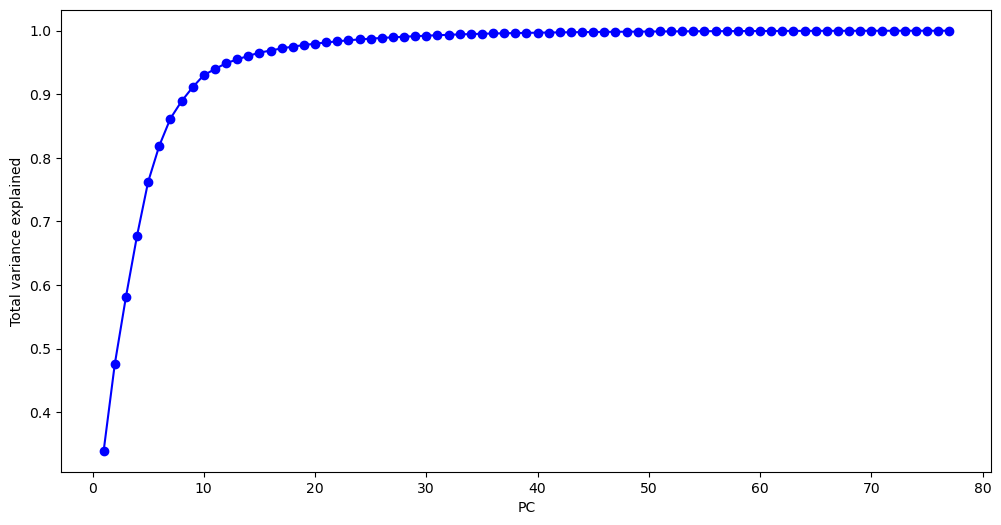

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 77 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC01    684 non-null    float64
 1   PC02    684 non-null    float64
 2   PC03    684 non-null    float64
 3   PC04    684 non-null    float64
 4   PC05    684 non-null    float64
 5   PC06    684 non-null    float64
 6   PC07    684 non-null    float64
 7   PC08    684 non-null    float64
 8   PC09    684 non-null    float64
 9   PC10    684 non-null    float64
 10  PC11    684 non-null    float64
 11  PC12    684 non-null    float64
 12  PC13    684 non-null    float64
 13  PC14    684 non-null    float64
 14  PC15    684 non-null    float64
 15  PC16    684 non-null    float64
 16  PC17    684 non-null    float64
 17  PC18    684 non-null    float64
 18  PC19    684 non-null    float64
 19  PC20    684 non-null    float64
 20  PC21    684 non-null    float64
 21  PC22    684 non-null    float64
 22  PC

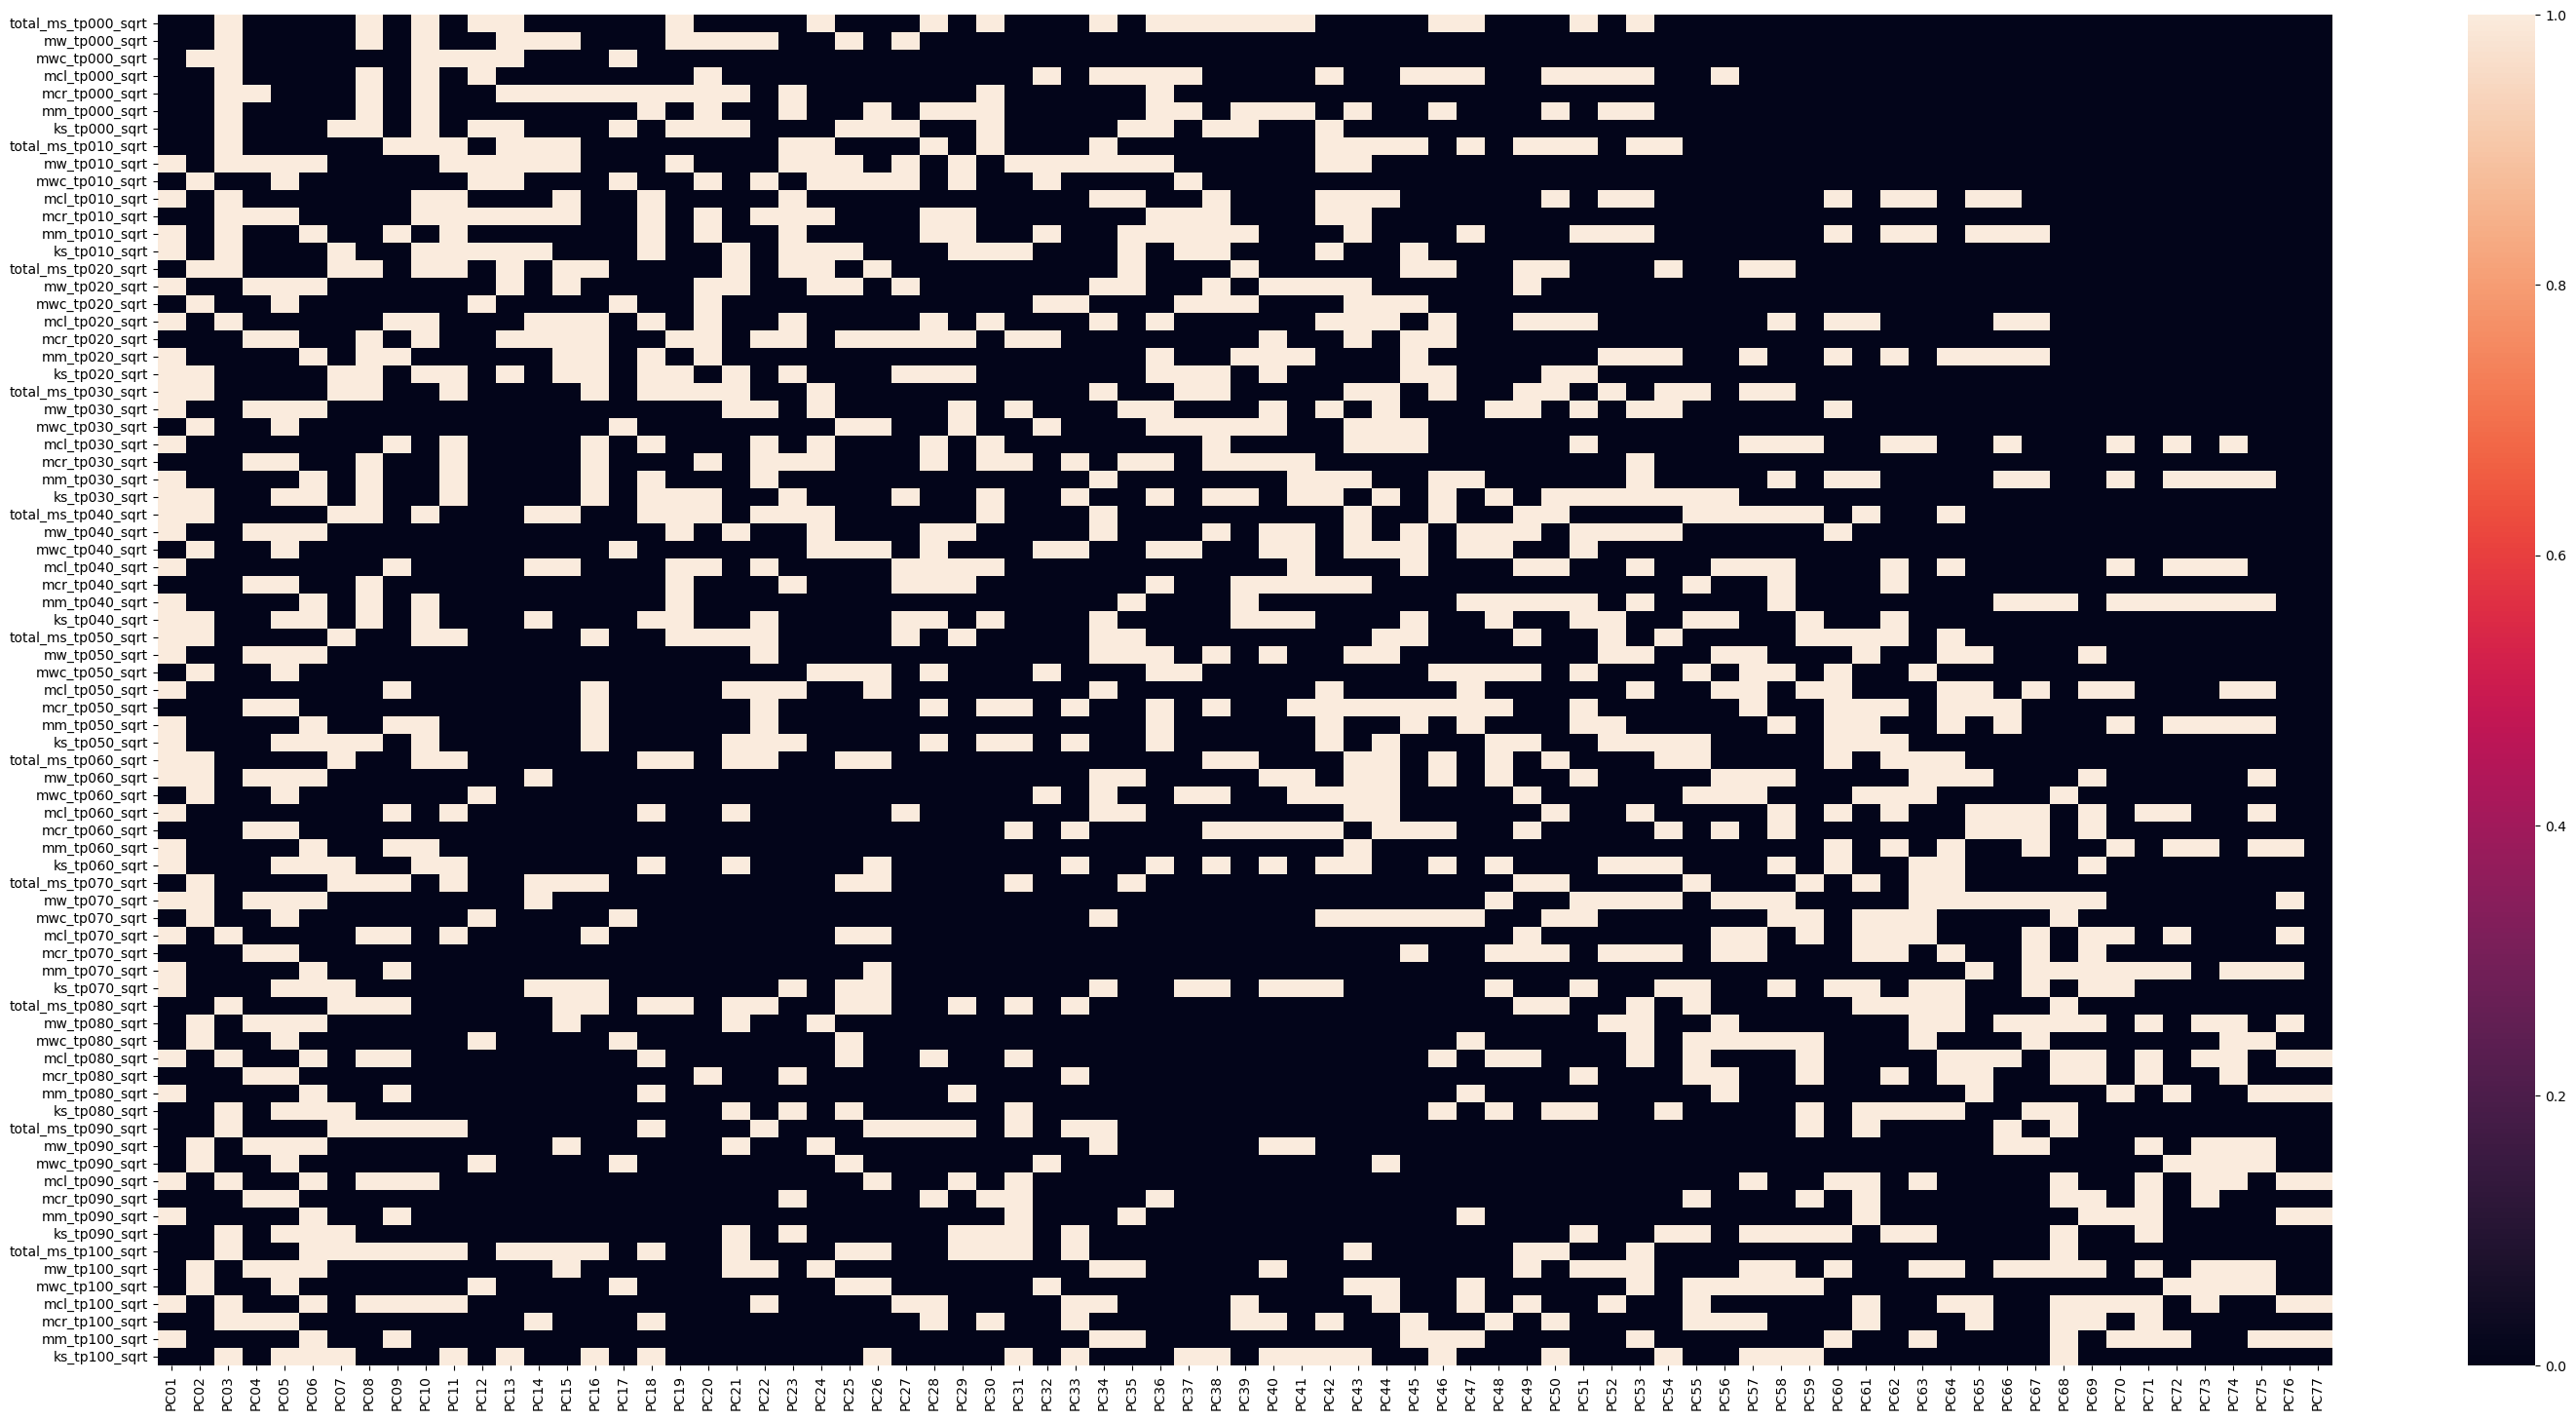

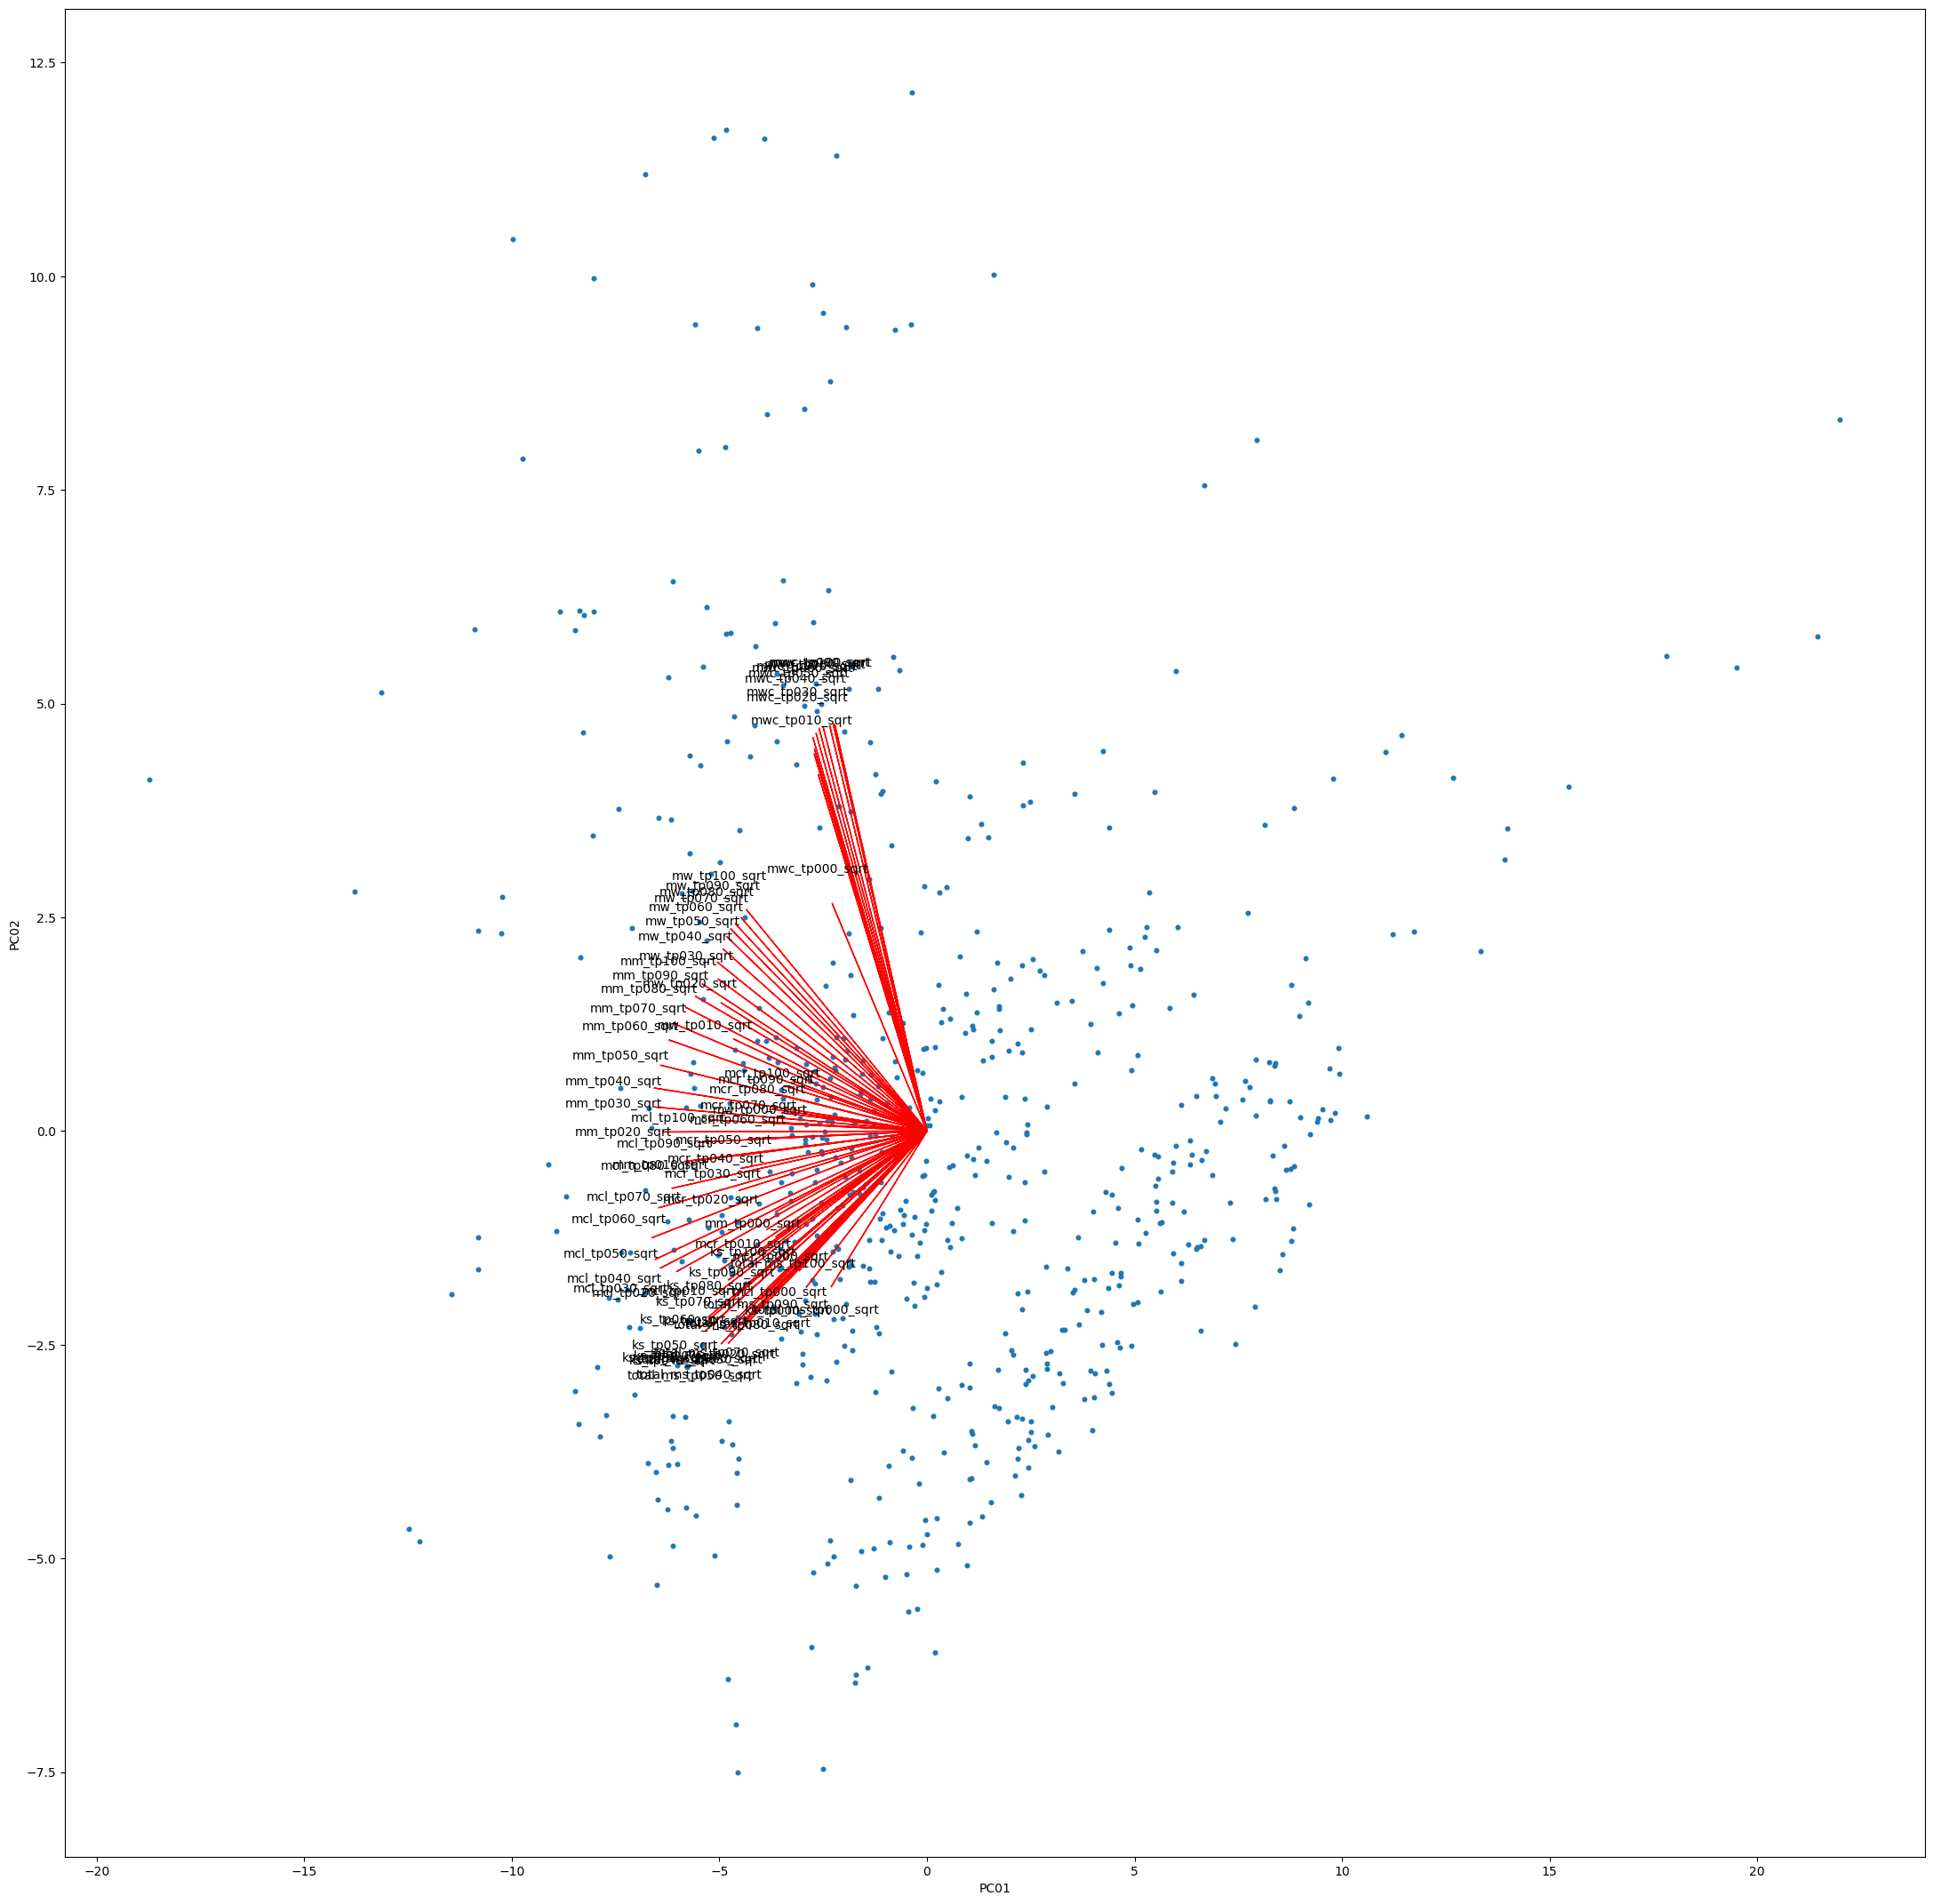

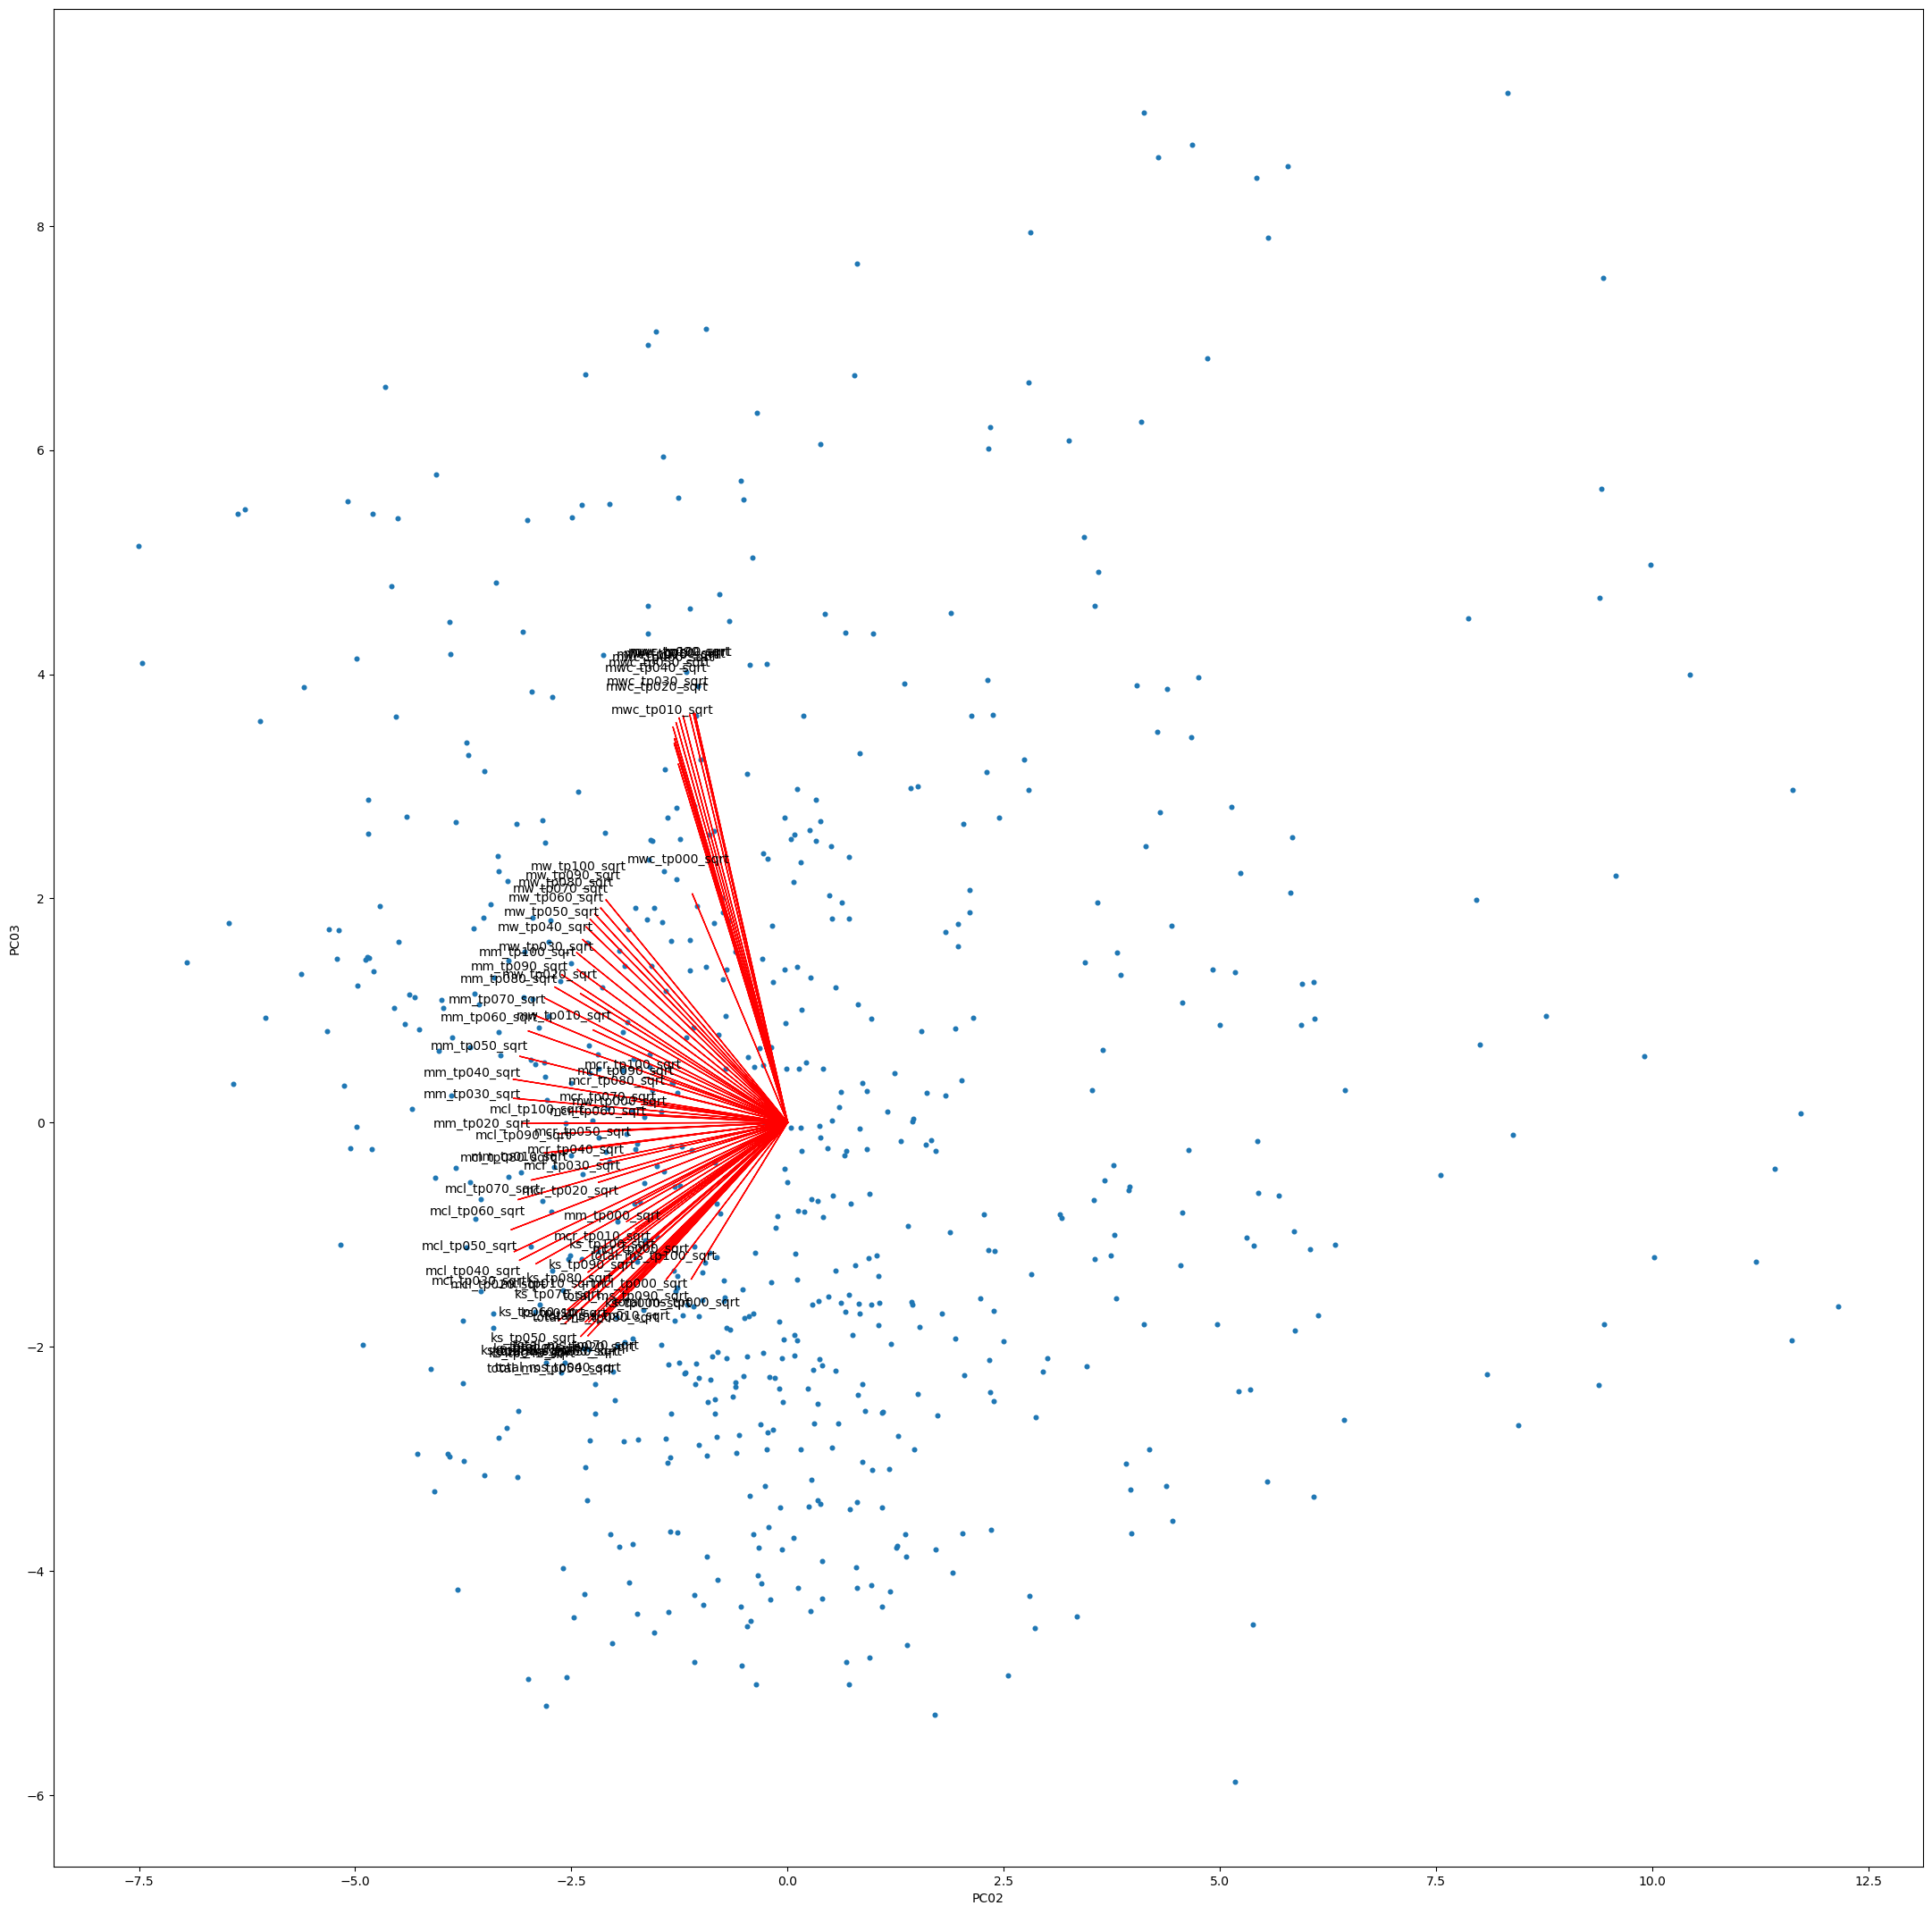

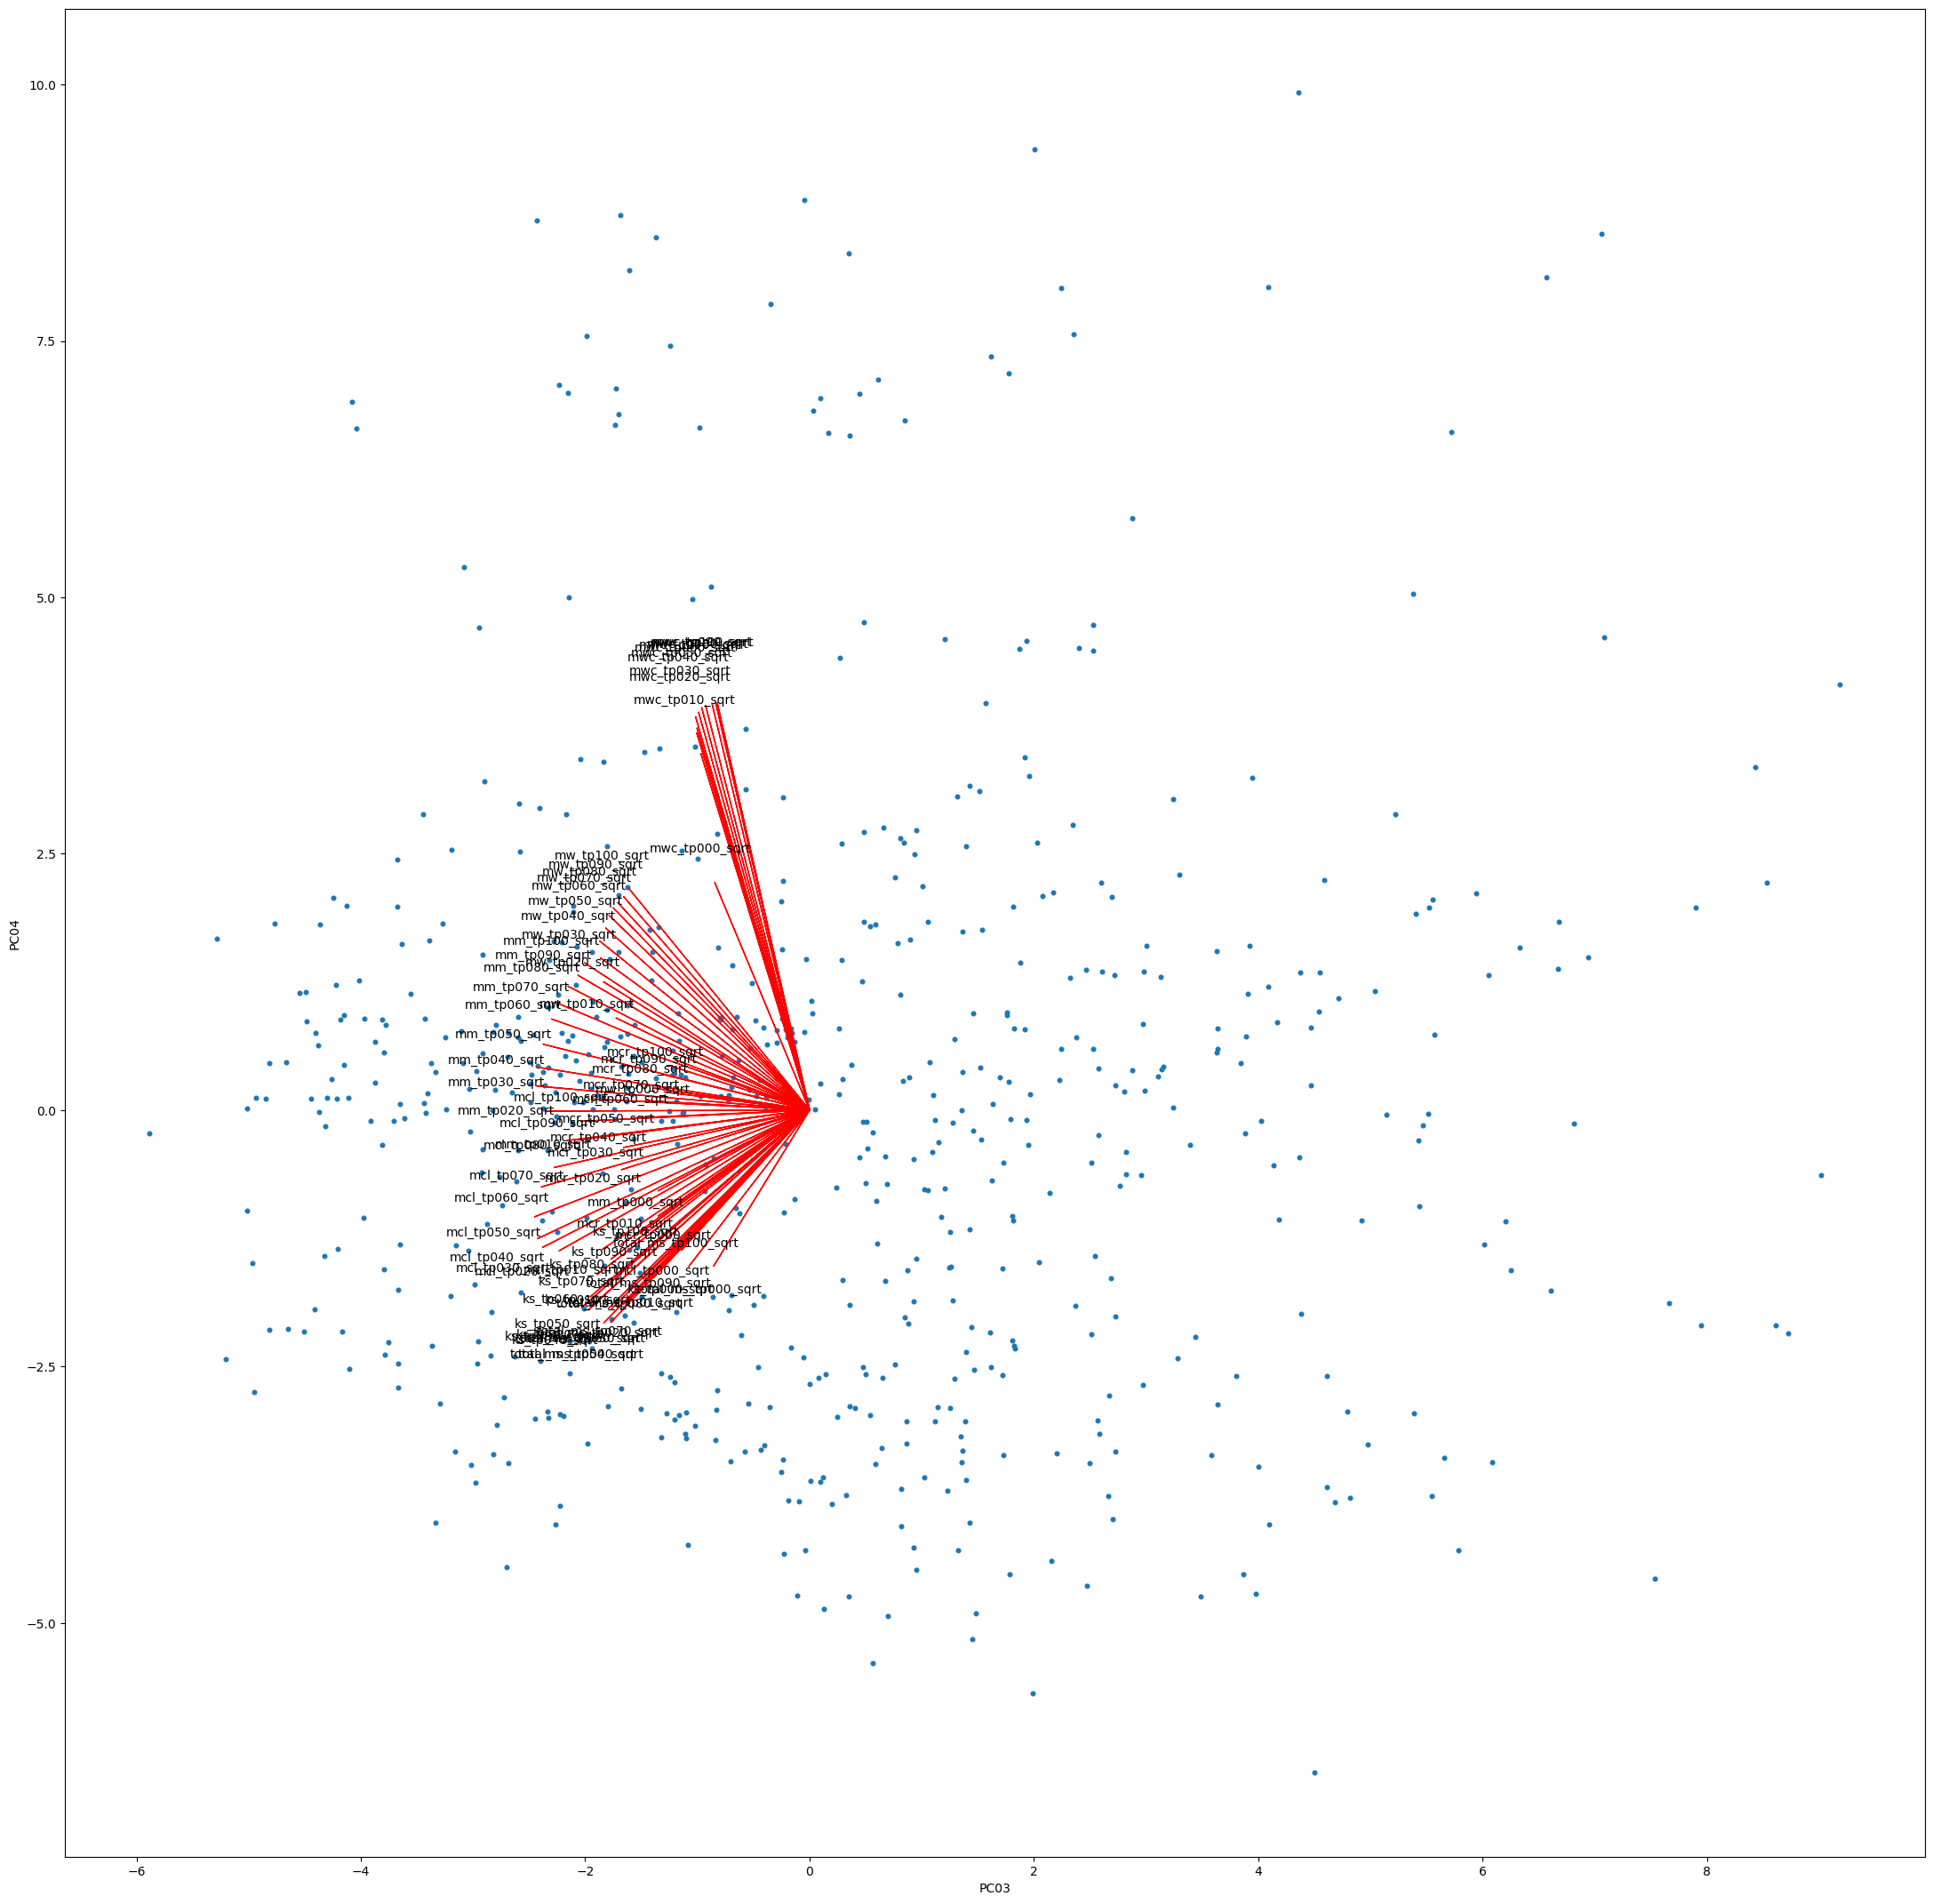

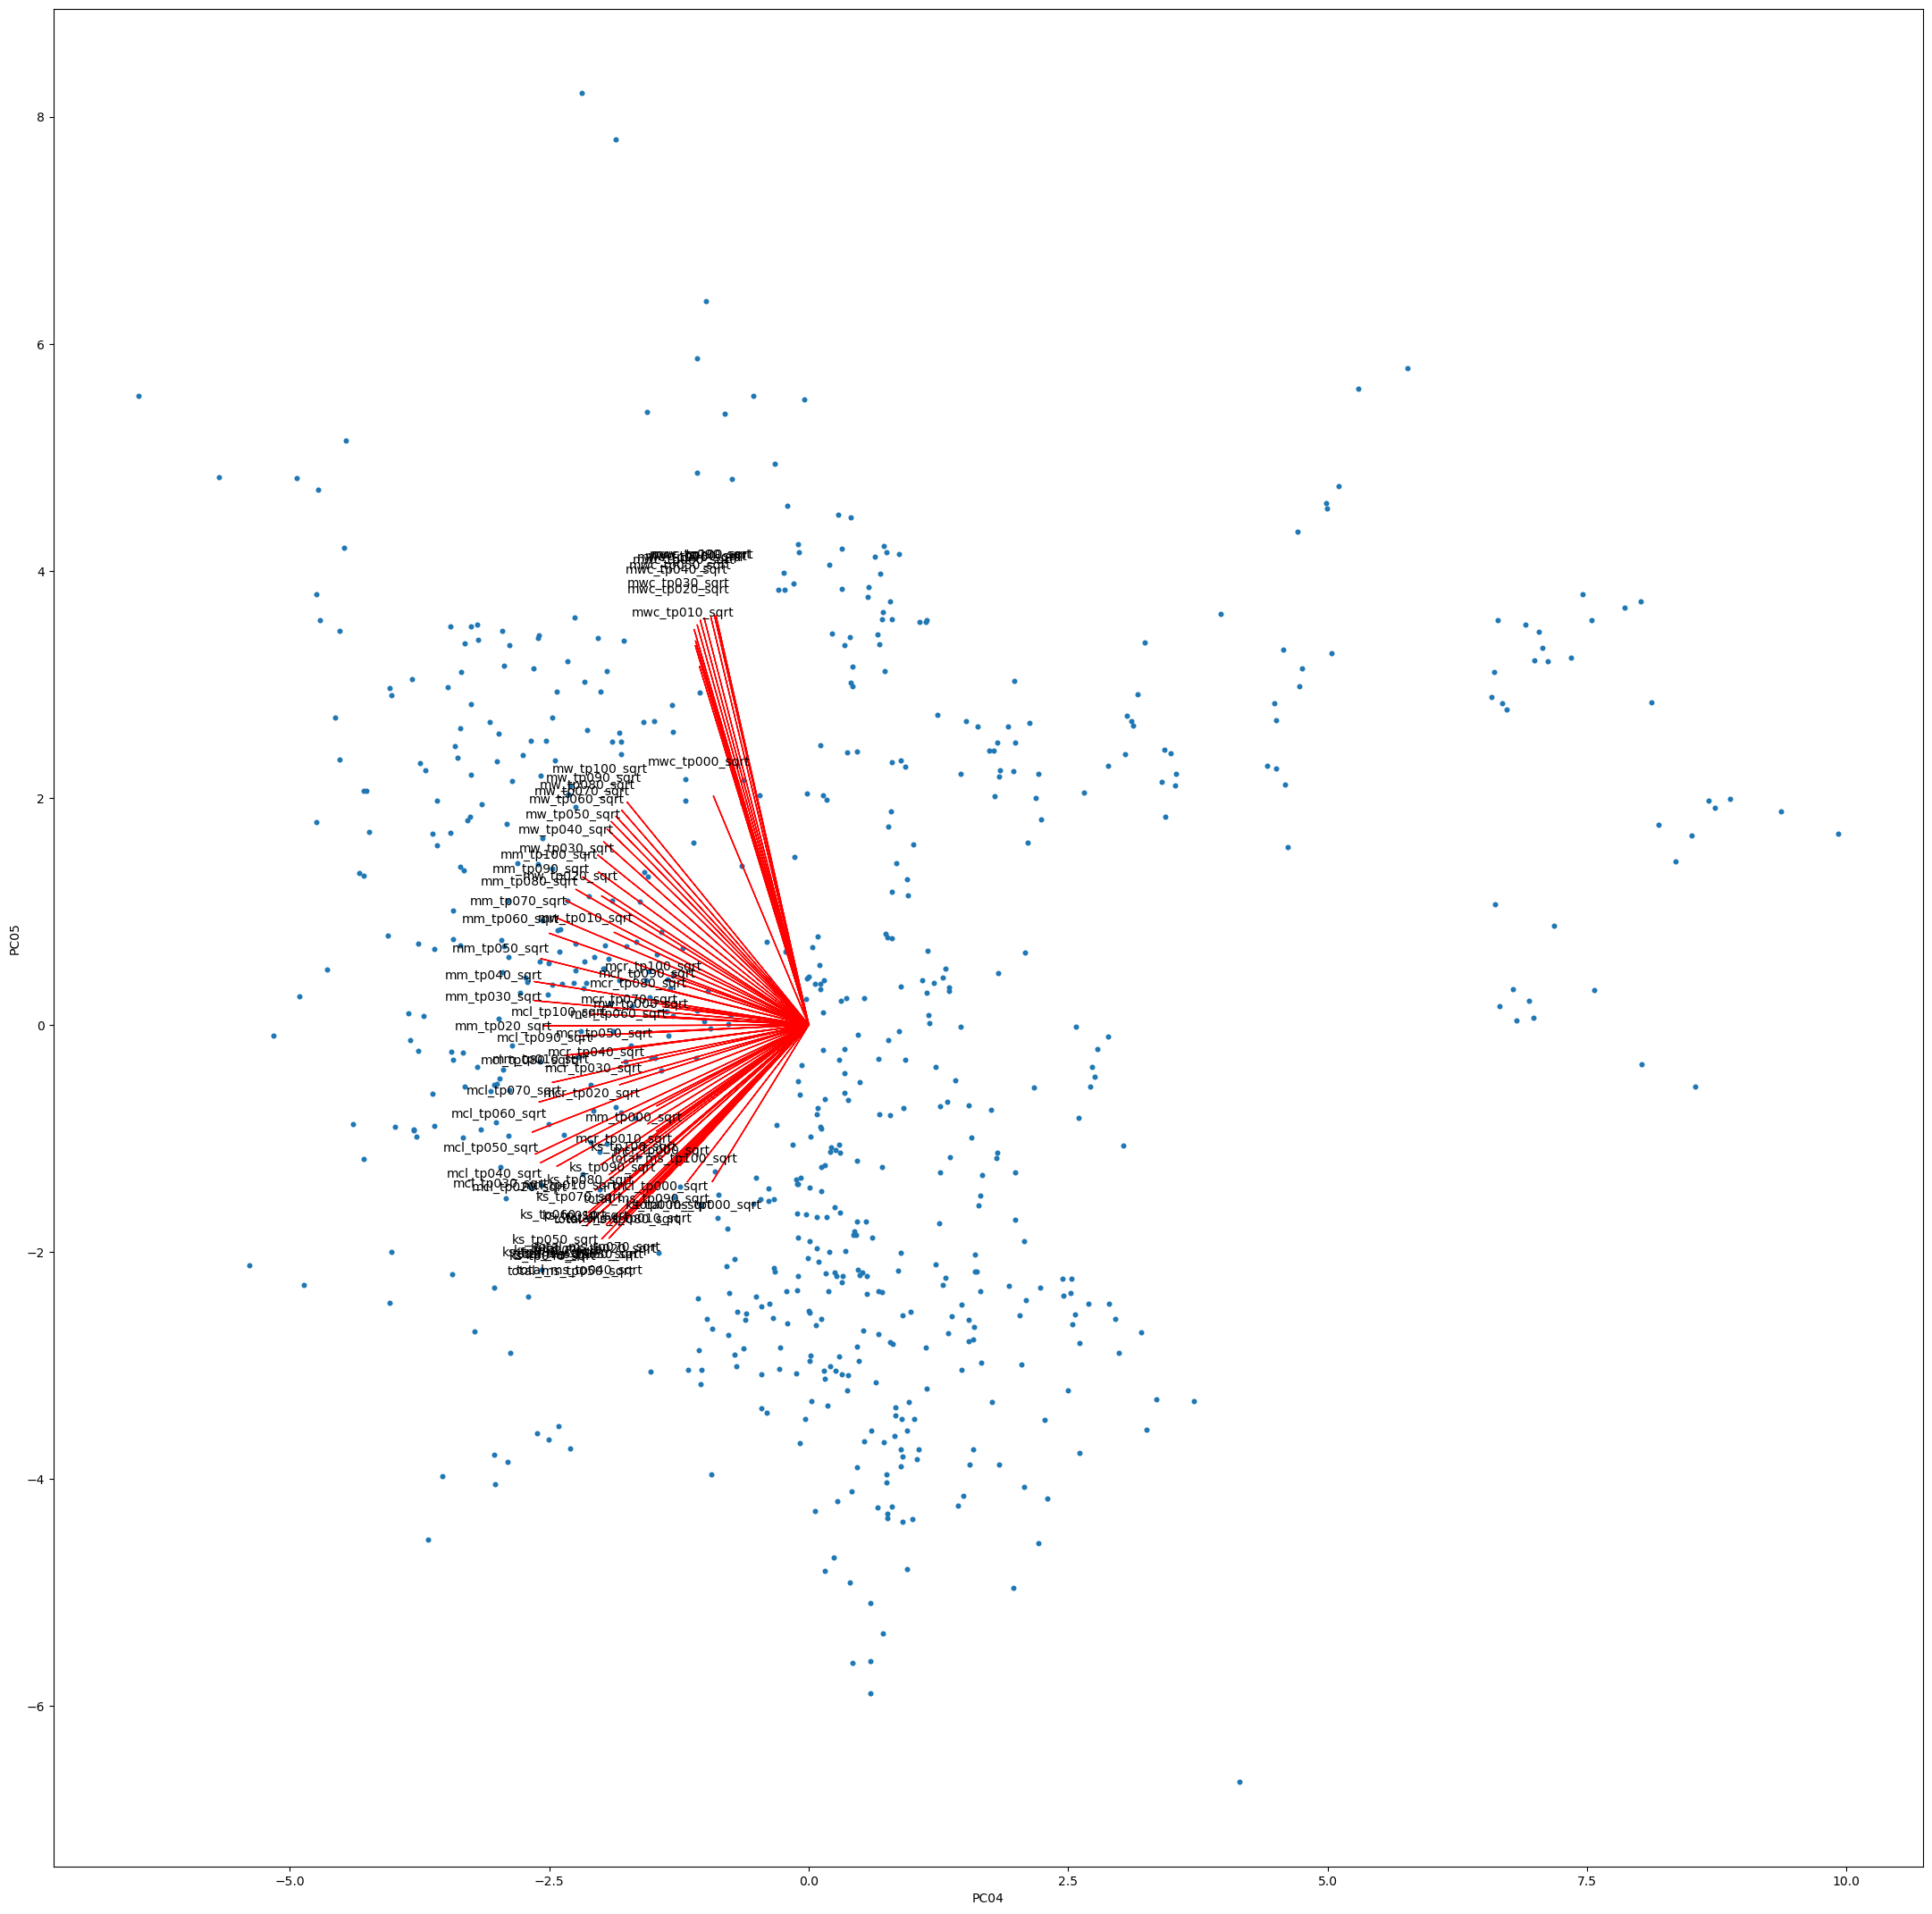

In [30]:
%run CMPINF2120_EPM_PCA_INCL_Over_Lisa.ipynb

In [31]:
pc_scores_select_df = pc_scores_df.copy()

In [32]:
select_Xtimepoints = Xtimepoints.copy()

In [33]:
num_pcs = 12

In [34]:
pc_cluster_df = pd.concat([select_sess_df.loc[:,['sid','actv_grp','interim_pass']].copy(), pc_scores_select_df.copy()], axis=1)

In [35]:
pc_cluster_df.sid = pc_cluster_df.sid.astype('category')

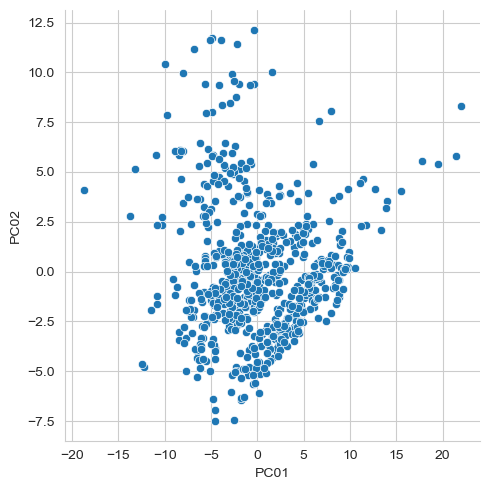

In [36]:
sns.set_style('whitegrid')

sns.relplot(data = pc_cluster_df, x='PC01', y='PC02')

plt.show()

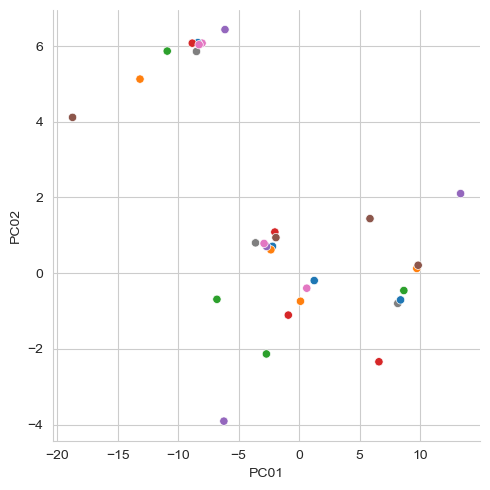

In [37]:
sns.set_style('whitegrid')

sns.relplot(data = pc_cluster_df, x='PC01', y='PC02', hue='actv_grp', legend=False)

plt.show()

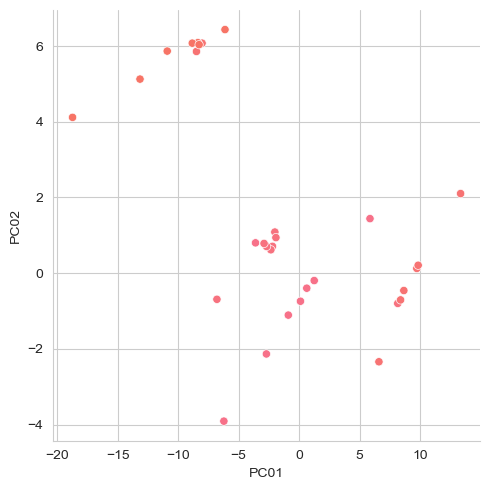

In [38]:
sns.set_style('whitegrid')

sns.relplot(data = pc_cluster_df, x='PC01', y='PC02', hue='sid', legend=False)

plt.show()

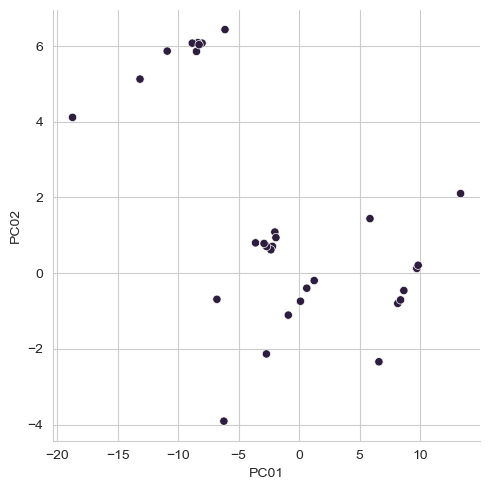

In [39]:
sns.set_style('whitegrid')

sns.relplot(data = pc_cluster_df, x='PC01', y='PC02', hue='interim_pass', legend=False)

plt.show()

#### Calculate the total within sum of squares to identify the "optimal" number of clusters using the 'knee bend, ' i.e., when the total within sum of squares stops dropping significantly.

The optimal number of clusters is 4.

In [40]:
tots_within = []

K = range(1, 31)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500).fit( pc_scores_select_df )
    tots_within.append( km.inertia_ )

In [41]:
pc_scores_12_df = pc_scores_select_df.iloc[:,:12].copy()

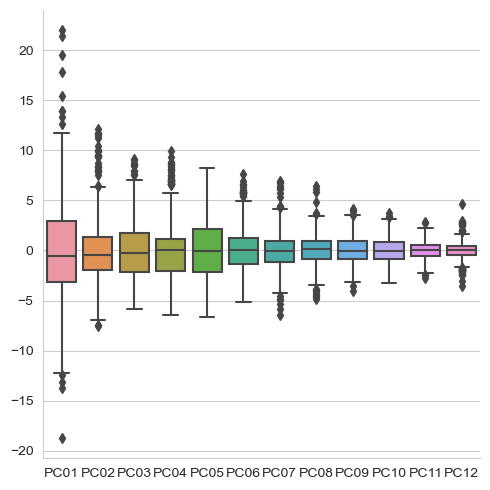

In [42]:
sns.catplot(data = pc_scores_12_df, kind='box')

#### Silhouette Coefficient

The silhouette coefficient shows that 2 clusters are optimal.

In [43]:
sil_coef = []

K = range(2, 31)

for k in K:
    k_label = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500).fit_predict( pc_scores_12_df )
    sil_coef.append( silhouette_score(pc_scores_12_df, k_label) )

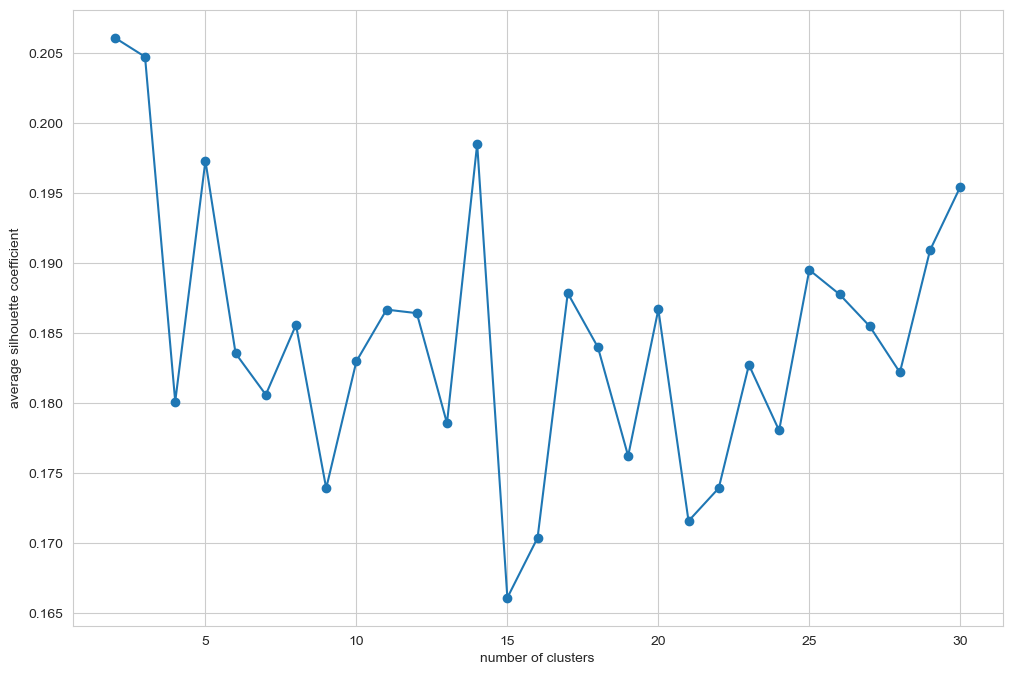

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(K, sil_coef, 'o-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('average silhouette coefficient')

plt.show()

#### Hierarchical clustering Ward method

The optimal number of clusters chosen from the dendrogram is 3 or 8.

In [45]:
hclust_ward = hierarchy.ward( pc_scores_12_df )

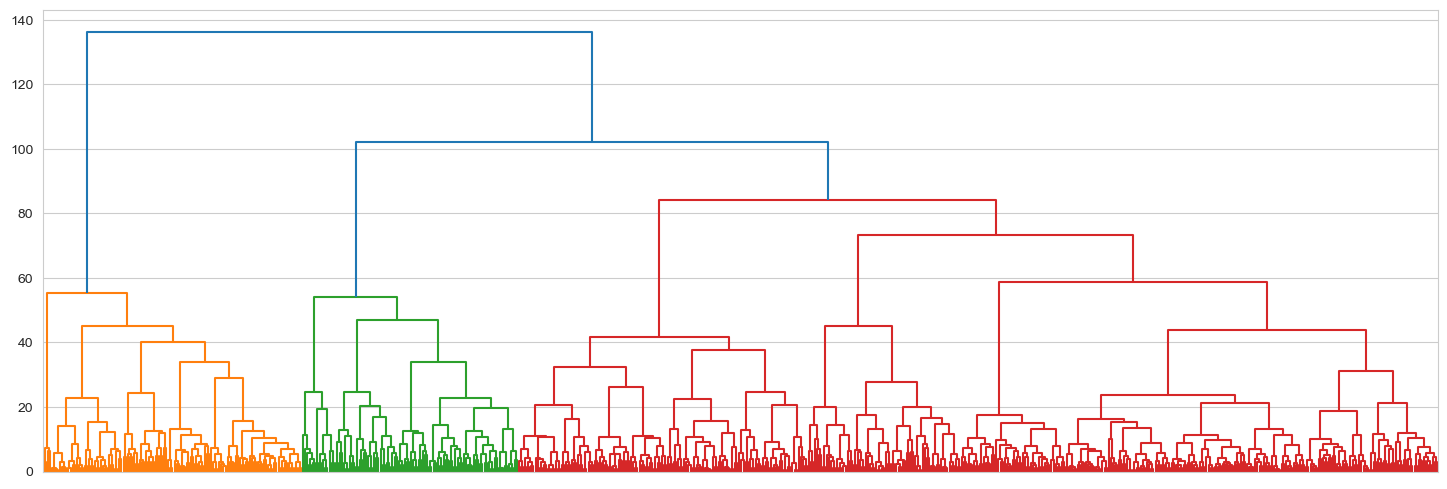

In [46]:
fig = plt.figure( figsize=(18,6) )

dn = hierarchy.dendrogram( hclust_ward, no_labels=True )

plt.show()

In [47]:
ward_cut_a = hierarchy.cut_tree( hclust_ward, n_clusters=8 )

In [48]:
ward_cut_a0 = hierarchy.cut_tree( hclust_ward, n_clusters=3 )

In [49]:
ward_cut_a.shape

(684, 1)

In [50]:
type( ward_cut_a )

numpy.ndarray

In [51]:
ward_cut_a.ravel()

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 3, 2, 2,
       2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 3, 2, 2, 3, 3, 2, 3, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 0, 5,
       5, 0, 5, 0, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 3, 3, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 5, 5, 5, 5, 5,
       5, 5, 5, 2, 2, 2, 3, 2, 3, 1, 2, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 2, 2, 3, 2, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 1, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 2, 3, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 3, 2, 3, 3, 1, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,
       1, 0, 0, 1, 0, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5,

In [52]:
pc_scores_12_df.index

RangeIndex(start=0, stop=684, step=1)

#### Add Ward hierarchical clustering labels to the PC dataframe and visualize.

In [53]:
pc_scores_12_df['hclust_a'] = pd.Series( ward_cut_a.ravel(), index=pc_scores_12_df.index )

pc_scores_12_df['hclust_a'] = pc_scores_12_df.hclust_a.astype('category')

In [54]:
pc_scores_12_df['hclust_a0'] = pd.Series( ward_cut_a0.ravel(), index=pc_scores_12_df.index )

pc_scores_12_df['hclust_a0'] = pc_scores_12_df.hclust_a0.astype('category')

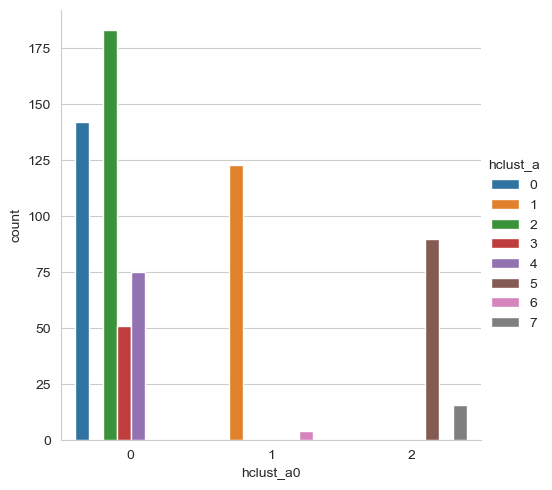

In [55]:
sns.catplot(data = pc_scores_12_df, x='hclust_a0', hue='hclust_a', kind='count')

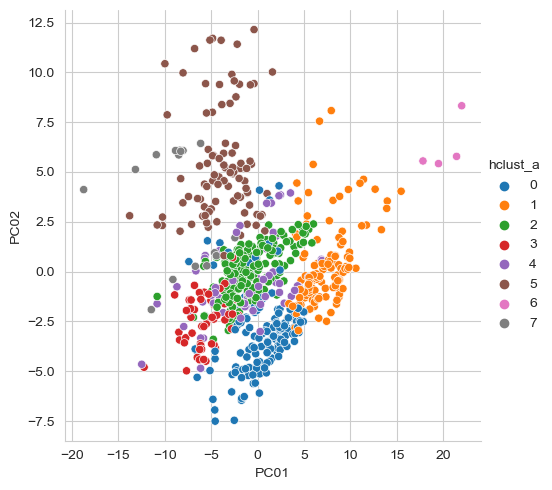

In [56]:
sns.relplot(data = pc_scores_12_df, x='PC01', y='PC02', hue='hclust_a')

plt.show()

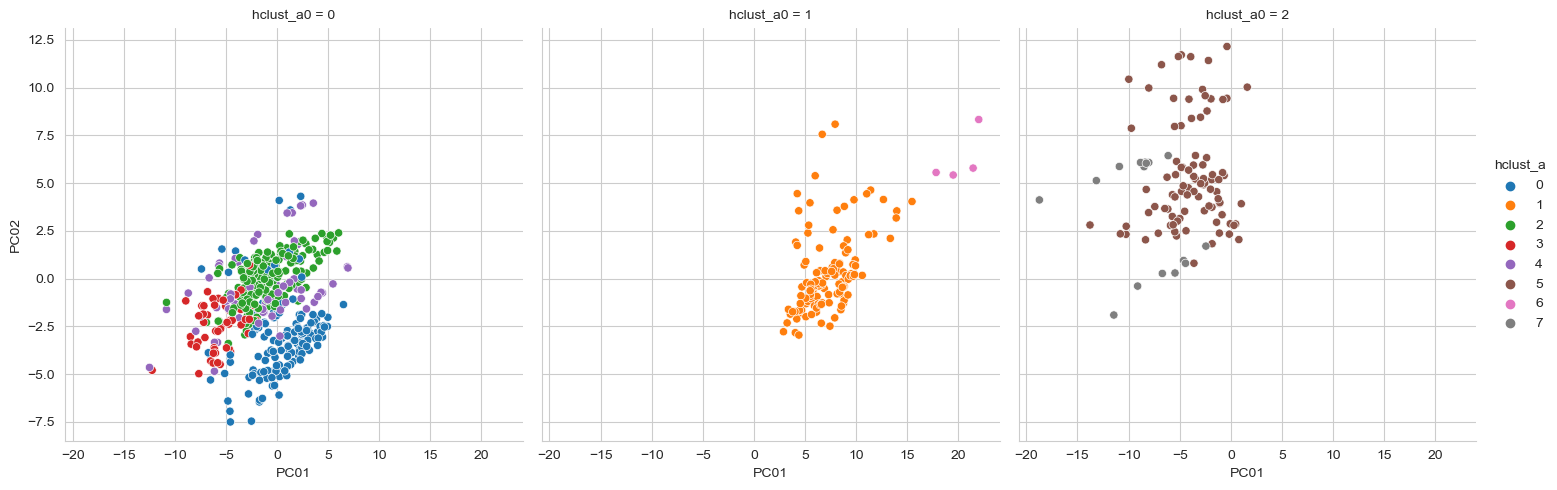

In [57]:
sns.relplot(data = pc_scores_12_df, x='PC01', y='PC02', col='hclust_a0', hue='hclust_a')

plt.show()

#### Add `select_sess_df` to `pc_cluster_df` dataset (merge).

In [58]:
pc_scores_outp_df = pd.concat([select_sess_df.loc[:,['sid','actv_grp','interim_pass']].copy(), pc_scores_12_df.copy()], axis=1)

In [59]:
pc_scores_outp_df.head()

,sid,actv_grp,interim_pass,PC01,PC02,PC03,PC04,PC05,PC06,PC07,PC08,PC09,PC10,PC11,PC12,hclust_a,hclust_a0
653,2.0,Aulaweb,1.0,1.243888,-0.194865,-1.422462,1.754434,-0.746909,-1.231178,3.020375,1.364173,1.212701,0.779248,1.449629,-0.206498,4,0
654,2.0,Blank,1.0,0.106988,-0.740887,-1.407201,1.263576,-0.712784,-1.212260,3.074962,0.591506,1.617775,0.889883,1.513398,-0.458913,4,0
655,2.0,Deeds,1.0,-2.708881,-2.133565,4.170313,0.857947,-2.167076,-1.038828,1.471239,-2.133631,2.420663,0.183425,0.299691,-0.262321,3,0
656,2.0,Diagram,1.0,-0.897608,-1.107260,-0.248005,1.569805,-0.992424,-1.095644,3.205990,2.263915,1.546776,-0.788815,0.130550,0.315816,4,0
657,2.0,Other,1.0,-6.222978,-3.908513,4.465966,0.245749,-1.607440,-0.835841,2.693033,-0.105511,2.138642,0.655484,0.007186,-0.300847,3,0


In [60]:
pc_scores_outp_df.interim_pass.mean()

0.5833333333333334

#### Number of observations per cluster

In [61]:
pc_scores_outp_df.hclust_a.value_counts().reset_index()

,index,hclust_a
0,2,183
1,0,142
2,1,123
3,5,90
4,4,75
5,3,51
6,7,16
7,6,4


In [62]:
pc_scores_outp_df.hclust_a0.value_counts().reset_index()

,index,hclust_a0
0,0,451
1,1,127
2,2,106


#### Compare hierarchical clusters to dichotomous variable binary_outcome (yes/1 if passed intermediate evaluation for the select session).

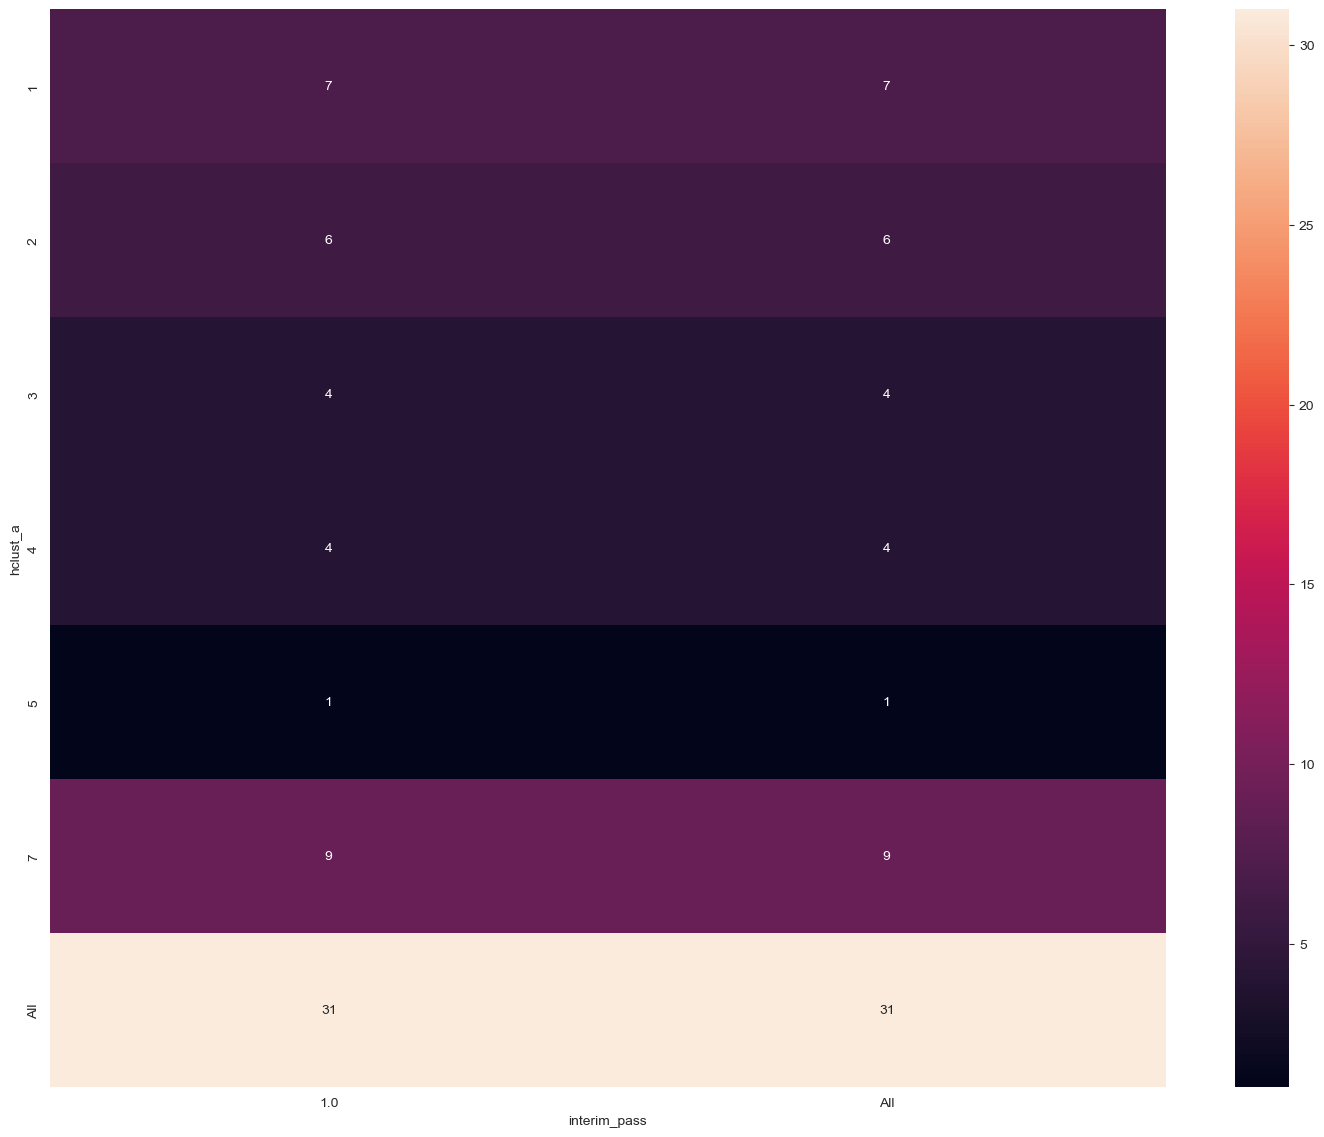

In [63]:
fig, ax = plt.subplots(figsize=(18,14))

sns.heatmap(pd.crosstab(pc_scores_outp_df.hclust_a, pc_scores_outp_df.interim_pass, margins=True),
            annot=True, annot_kws={'size': 10}, fmt='g')

plt.show()

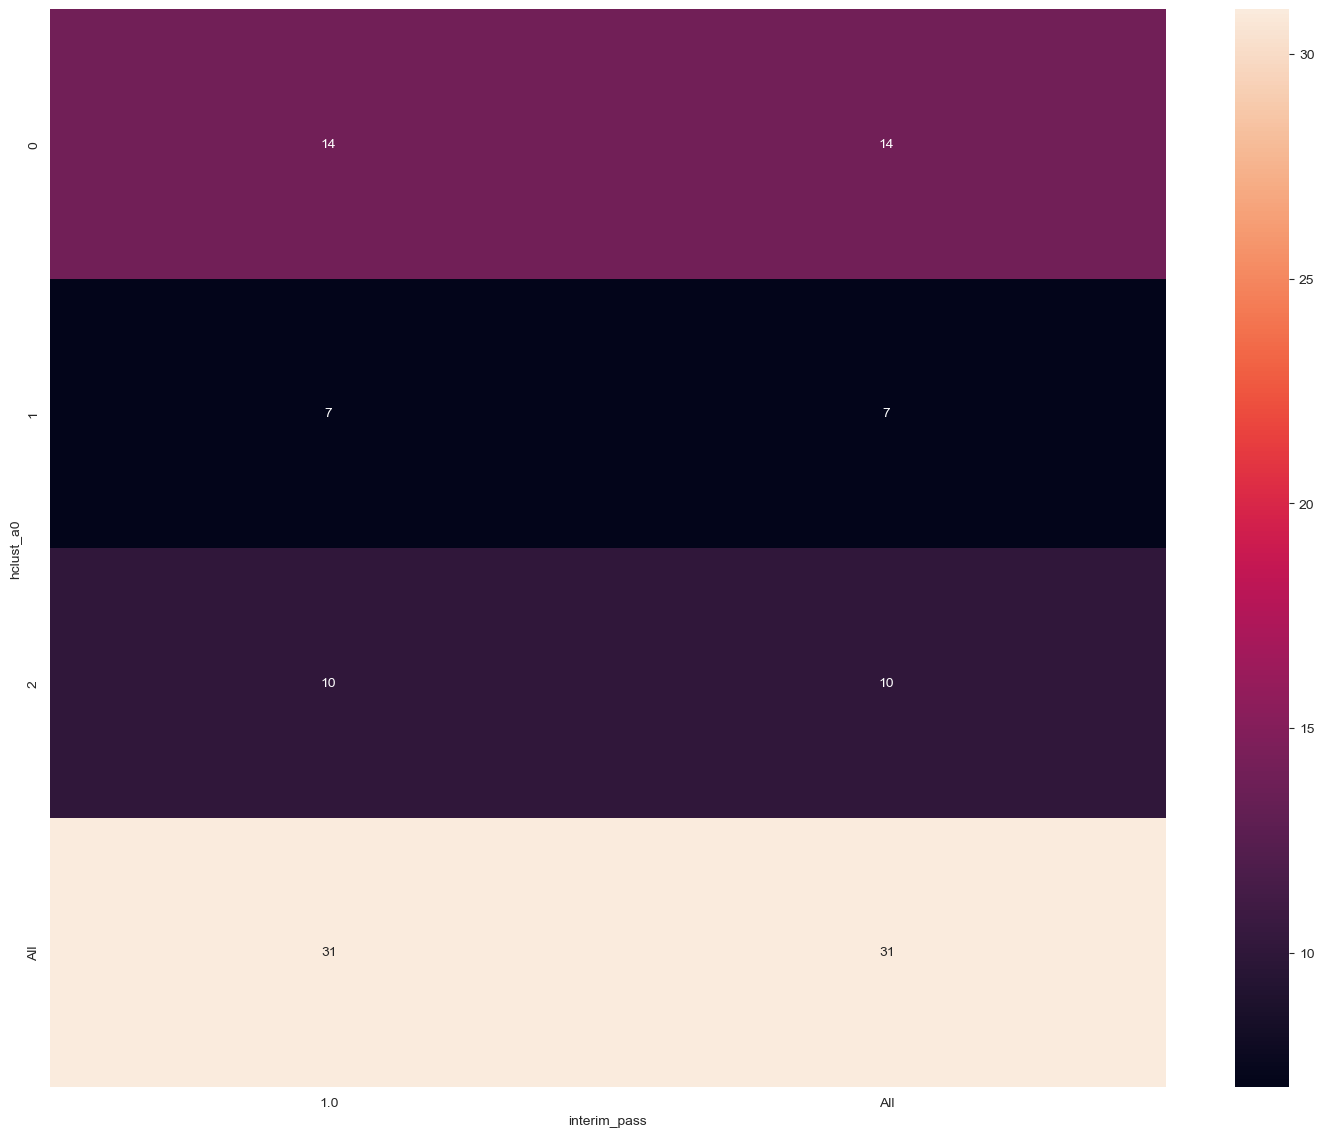

In [64]:
fig, ax = plt.subplots(figsize=(18,14))

sns.heatmap(pd.crosstab(pc_scores_outp_df.hclust_a0, pc_scores_outp_df.interim_pass, margins=True),
            annot=True, annot_kws={'size': 10}, fmt='g')

plt.show()

## Logistic Regression with PCs

In [65]:
pc_to_model_df = pd.concat([select_sess_df.loc[:,['sid','actv_grp','interim_pass']].copy(), pc_scores_select_df.copy()], axis=1)

In [66]:
pc_features = ['PC01','PC02','PC03','PC04','PC05','PC06','PC07','PC08','PC09','PC10','PC11','PC12']

In [67]:
pc_features_str = ''
for ix, x in enumerate(pc_features):
    if ix == len(pc_features) - 1:
        pc_features_str = pc_features_str + x
    else:
        pc_features_str = pc_features_str + x + ' + '
pc_features_str

'PC01 + PC02 + PC03 + PC04 + PC05 + PC06 + PC07 + PC08 + PC09 + PC10 + PC11 + PC12'

In [68]:
pc_desc_formulas = ['interim_pass ~ sid'
                        ,'interim_pass ~ sid + actv_grp'
                        ,'interim_pass ~ sid + actv_grp + ' + pc_features_str
                        ,'interim_pass ~ sid * (' + pc_features_str + ')'
                        ,'interim_pass ~ sid * (actv_grp + ' + pc_features_str + ')'
                       ]

In [69]:
pc_pred_formulas = ['interim_pass ~ ' + pc_features_str
                    ,'interim_pass ~ (' + pc_features_str + ')**2'
                    ,'interim_pass ~ actv_grp + ' + pc_features_str
                    ,'interim_pass ~ actv_grp * (' + pc_features_str + ')'
                    ,'interim_pass ~ actv_grp + (' + pc_features_str + ')**2'
                    ,'interim_pass ~ actv_grp * (' + pc_features_str + ')**2'
                   ]

In [70]:
formula_list = pc_desc_formulas + pc_pred_formulas

In [71]:
formula_list

['interim_pass ~ sid',
 'interim_pass ~ sid + actv_grp',
 'interim_pass ~ sid + actv_grp + PC01 + PC02 + PC03 + PC04 + PC05 + PC06 + PC07 + PC08 + PC09 + PC10 + PC11 + PC12',
 'interim_pass ~ sid * (PC01 + PC02 + PC03 + PC04 + PC05 + PC06 + PC07 + PC08 + PC09 + PC10 + PC11 + PC12)',
 'interim_pass ~ sid * (actv_grp + PC01 + PC02 + PC03 + PC04 + PC05 + PC06 + PC07 + PC08 + PC09 + PC10 + PC11 + PC12)',
 'interim_pass ~ PC01 + PC02 + PC03 + PC04 + PC05 + PC06 + PC07 + PC08 + PC09 + PC10 + PC11 + PC12',
 'interim_pass ~ (PC01 + PC02 + PC03 + PC04 + PC05 + PC06 + PC07 + PC08 + PC09 + PC10 + PC11 + PC12)**2',
 'interim_pass ~ actv_grp + PC01 + PC02 + PC03 + PC04 + PC05 + PC06 + PC07 + PC08 + PC09 + PC10 + PC11 + PC12',
 'interim_pass ~ actv_grp * (PC01 + PC02 + PC03 + PC04 + PC05 + PC06 + PC07 + PC08 + PC09 + PC10 + PC11 + PC12)',
 'interim_pass ~ actv_grp + (PC01 + PC02 + PC03 + PC04 + PC05 + PC06 + PC07 + PC08 + PC09 + PC10 + PC11 + PC12)**2',
 'interim_pass ~ actv_grp * (PC01 + PC02 + PC0

##### Evaluate number of features with dmatrices

In [72]:
sk_list = make_dmat(pc_to_model_df, formula_list)

In [73]:
model_dim = make_dim_df(pc_to_model_df, sk_list, formula_list)

In [74]:
model_dim

,model name,dimensions,number of obs,dim < obs
0,0,2,1337,Yes
1,1,11,1337,Yes
2,2,23,1337,Yes
3,3,26,1337,Yes
4,4,44,1337,Yes
5,5,13,1337,Yes
6,6,79,1337,Yes
7,7,22,1337,Yes
8,8,130,1337,Yes
9,9,88,1337,Yes


### Statsmodels

In [75]:
def fit_model(dm_y, dm_X):
    return sm.GLM(dm_y, dm_X, family=sm.families.Binomial()).fit(bic_llf=True)

In [76]:
pc_dm00_y, pc_dm00_X = dmatrices(formula_list[0], data=pc_to_model_df, return_type='dataframe')
pc_dm01_y, pc_dm01_X = dmatrices(formula_list[1], data=pc_to_model_df, return_type='dataframe')
pc_dm02_y, pc_dm02_X = dmatrices(formula_list[2], data=pc_to_model_df, return_type='dataframe')
pc_dm03_y, pc_dm03_X = dmatrices(formula_list[3], data=pc_to_model_df, return_type='dataframe')
pc_dm04_y, pc_dm04_X = dmatrices(formula_list[4], data=pc_to_model_df, return_type='dataframe')
pc_dm05_y, pc_dm05_X = dmatrices(formula_list[5], data=pc_to_model_df, return_type='dataframe')
pc_dm06_y, pc_dm06_X = dmatrices(formula_list[6], data=pc_to_model_df, return_type='dataframe')
pc_dm07_y, pc_dm07_X = dmatrices(formula_list[7], data=pc_to_model_df, return_type='dataframe')
pc_dm08_y, pc_dm08_X = dmatrices(formula_list[8], data=pc_to_model_df, return_type='dataframe')
pc_dm09_y, pc_dm09_X = dmatrices(formula_list[9], data=pc_to_model_df, return_type='dataframe')
pc_dm10_y, pc_dm10_X = dmatrices(formula_list[10], data=pc_to_model_df, return_type='dataframe')

In [77]:
model_list = []

In [78]:
model_list.append( fit_model(pc_dm00_y, pc_dm00_X) )

In [79]:
time.sleep(5)

In [80]:
model_list.append( fit_model(pc_dm01_y, pc_dm01_X) )

The following models have perfect separation.

In [81]:
#time.sleep(5)

In [82]:
#model_list.append( fit_model(pc_dm02_y, pc_dm02_X) )

In [83]:
#time.sleep(5)

In [84]:
#model_list.append( fit_model(pc_dm03_y, pc_dm03_X) )

In [85]:
#time.sleep(5)

In [86]:
#model_list.append( fit_model(pc_dm04_y, pc_dm04_X) )

In [87]:
#time.sleep(5)

In [88]:
#model_list.append( fit_model(pc_dm05_y, pc_dm05_X) )

In [89]:
#time.sleep(5)

In [90]:
#model_list.append( fit_model(pc_dm06_y, pc_dm06_X) )

In [91]:
#time.sleep(5)

In [92]:
#model_list.append( fit_model(pc_dm07_y, pc_dm07_X) )

In [93]:
#time.sleep(5)

In [94]:
#model_list.append( fit_model(pc_dm08_y, pc_dm08_X) )

In [95]:
#time.sleep(5)

In [96]:
#model_list.append( fit_model(pc_dm09_y, pc_dm09_X) )

In [97]:
#time.sleep(5)

In [98]:
#model_list.append( fit_model(pc_dm10_y, pc_dm10_X) )

In [99]:
model_results = pd.DataFrame({'model_name': ['mod00','mod01'],
                              'AIC': [mod.aic for mod in model_list],
                              'BIC': [mod.bic for mod in model_list]})

/Users/lisaover/opt/anaconda3/envs/cmpinf2120/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


In [100]:
model_results

,model_name,AIC,BIC
0,mod00,926.552350,-3529.514949
1,mod01,941.658395,-3473.657283


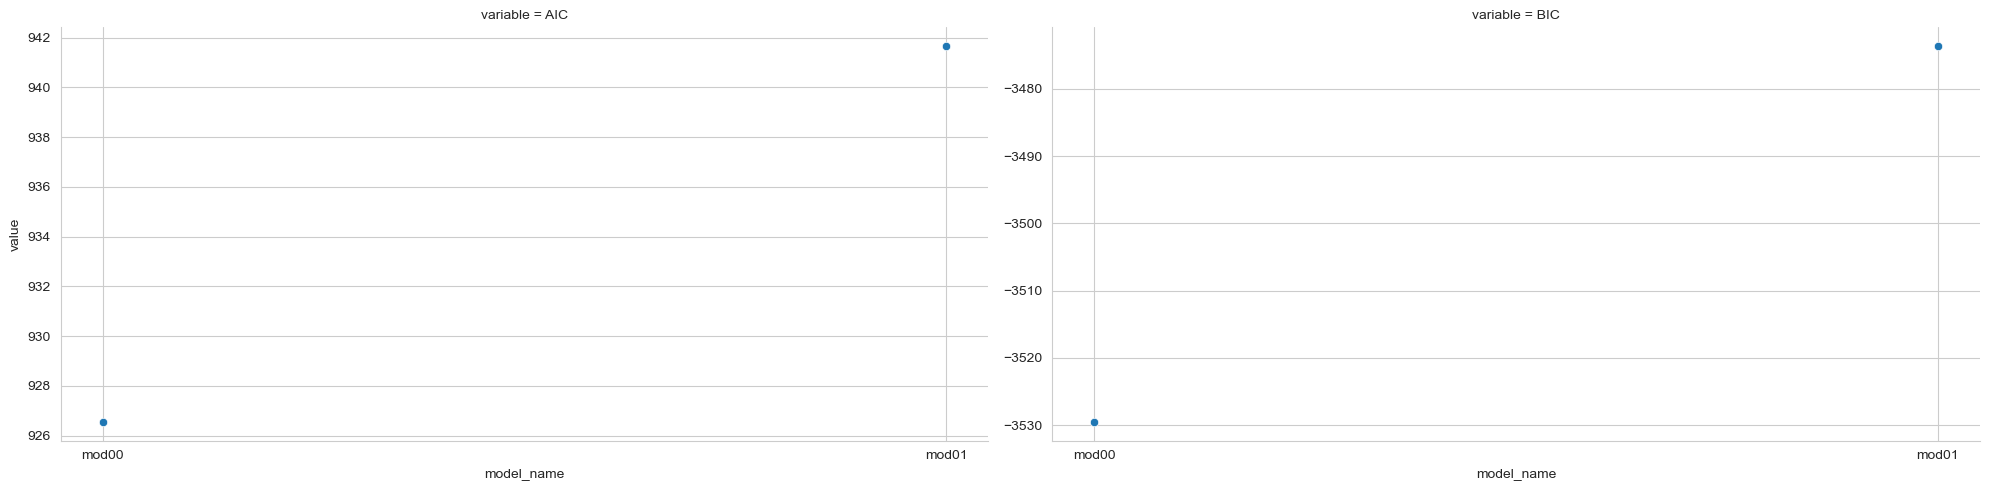

In [101]:
sns.relplot(data = model_results.melt(id_vars=['model_name']),
            x='model_name',
            y='value', 
            col='variable',
            col_wrap=2,
            facet_kws = {'sharey': False},
            height=5, aspect=2)

plt.show()

## ElasticNet Logistic Regression

#### Preprocess with Pipelines - include sid and actv_grp as categorical inputs

In [102]:
select_sess_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 653 to 1336
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sess                 684 non-null    int64  
 1   sid                  684 non-null    int64  
 2   actv_grp             684 non-null    object 
 3   total_ms_tp000_sqrt  684 non-null    float64
 4   mw_tp000_sqrt        684 non-null    float64
 5   mwc_tp000_sqrt       684 non-null    float64
 6   mcl_tp000_sqrt       684 non-null    float64
 7   mcr_tp000_sqrt       684 non-null    float64
 8   mm_tp000_sqrt        684 non-null    float64
 9   ks_tp000_sqrt        684 non-null    float64
 10  total_ms_tp010_sqrt  684 non-null    float64
 11  mw_tp010_sqrt        684 non-null    float64
 12  mwc_tp010_sqrt       684 non-null    float64
 13  mcl_tp010_sqrt       684 non-null    float64
 14  mcr_tp010_sqrt       684 non-null    float64
 15  mm_tp010_sqrt        684 non-null    

In [103]:
categorical_inputs = ['sid','actv_grp']


In [104]:
sqrt_vars

['total_ms_tp000_sqrt',
 'mw_tp000_sqrt',
 'mwc_tp000_sqrt',
 'mcl_tp000_sqrt',
 'mcr_tp000_sqrt',
 'mm_tp000_sqrt',
 'ks_tp000_sqrt',
 'total_ms_tp010_sqrt',
 'mw_tp010_sqrt',
 'mwc_tp010_sqrt',
 'mcl_tp010_sqrt',
 'mcr_tp010_sqrt',
 'mm_tp010_sqrt',
 'ks_tp010_sqrt',
 'total_ms_tp020_sqrt',
 'mw_tp020_sqrt',
 'mwc_tp020_sqrt',
 'mcl_tp020_sqrt',
 'mcr_tp020_sqrt',
 'mm_tp020_sqrt',
 'ks_tp020_sqrt',
 'total_ms_tp030_sqrt',
 'mw_tp030_sqrt',
 'mwc_tp030_sqrt',
 'mcl_tp030_sqrt',
 'mcr_tp030_sqrt',
 'mm_tp030_sqrt',
 'ks_tp030_sqrt',
 'total_ms_tp040_sqrt',
 'mw_tp040_sqrt',
 'mwc_tp040_sqrt',
 'mcl_tp040_sqrt',
 'mcr_tp040_sqrt',
 'mm_tp040_sqrt',
 'ks_tp040_sqrt',
 'total_ms_tp050_sqrt',
 'mw_tp050_sqrt',
 'mwc_tp050_sqrt',
 'mcl_tp050_sqrt',
 'mcr_tp050_sqrt',
 'mm_tp050_sqrt',
 'ks_tp050_sqrt',
 'total_ms_tp060_sqrt',
 'mw_tp060_sqrt',
 'mwc_tp060_sqrt',
 'mcl_tp060_sqrt',
 'mcr_tp060_sqrt',
 'mm_tp060_sqrt',
 'ks_tp060_sqrt',
 'total_ms_tp070_sqrt',
 'mw_tp070_sqrt',
 'mwc_tp070_s

In [105]:
categorical_transform = Pipeline( steps = [ ('dummy', OneHotEncoder(drop='first')) ] )


In [106]:
numeric_transform_pca = Pipeline( steps=[('std_input', StandardScaler()),
                                        ('pca', PCA(n_components=num_pcs)),
                                        ('std_features', StandardScaler())])


In [107]:
complex_transform = ColumnTransformer( transformers=[('num', numeric_transform_pca, sqrt_vars),
                                                    ('cat', categorical_transform, categorical_inputs)])

In [108]:
complex_transform.transformers


[('num',
  Pipeline(steps=[('std_input', StandardScaler()), ('pca', PCA(n_components=12)),
                  ('std_features', StandardScaler())]),
  ['total_ms_tp000_sqrt',
   'mw_tp000_sqrt',
   'mwc_tp000_sqrt',
   'mcl_tp000_sqrt',
   'mcr_tp000_sqrt',
   'mm_tp000_sqrt',
   'ks_tp000_sqrt',
   'total_ms_tp010_sqrt',
   'mw_tp010_sqrt',
   'mwc_tp010_sqrt',
   'mcl_tp010_sqrt',
   'mcr_tp010_sqrt',
   'mm_tp010_sqrt',
   'ks_tp010_sqrt',
   'total_ms_tp020_sqrt',
   'mw_tp020_sqrt',
   'mwc_tp020_sqrt',
   'mcl_tp020_sqrt',
   'mcr_tp020_sqrt',
   'mm_tp020_sqrt',
   'ks_tp020_sqrt',
   'total_ms_tp030_sqrt',
   'mw_tp030_sqrt',
   'mwc_tp030_sqrt',
   'mcl_tp030_sqrt',
   'mcr_tp030_sqrt',
   'mm_tp030_sqrt',
   'ks_tp030_sqrt',
   'total_ms_tp040_sqrt',
   'mw_tp040_sqrt',
   'mwc_tp040_sqrt',
   'mcl_tp040_sqrt',
   'mcr_tp040_sqrt',
   'mm_tp040_sqrt',
   'ks_tp040_sqrt',
   'total_ms_tp050_sqrt',
   'mw_tp050_sqrt',
   'mwc_tp050_sqrt',
   'mcl_tp050_sqrt',
   'mcr_tp050_sqrt',

In [109]:
additive_transform = Pipeline( steps=[ ('prepro', complex_transform),
                                          ('make_poly', PolynomialFeatures(degree=1, interaction_only=True, include_bias=False))])

In [110]:
additive_transform.fit_transform(select_sess_df).shape

(684, 106)

In [111]:
len(sqrt_vars)

77

In [112]:
select_sess_df.shape

(684, 81)

In [113]:
select_sess_X = select_sess_df.drop(columns=['sess','interim_pass']).copy()

In [114]:
select_sess_df.interim_pass.value_counts()

1.0    399
0.0    285
Name: interim_pass, dtype: int64

In [115]:
select_sess_df.interim_pass.to_numpy().ravel()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0.

In [116]:
select_sess_y = select_sess_df.interim_pass.to_numpy().ravel()

In [117]:
select_sess_X.shape

(684, 79)

In [118]:
select_sess_X.columns

Index(['sid', 'actv_grp', 'total_ms_tp000_sqrt', 'mw_tp000_sqrt',
       'mwc_tp000_sqrt', 'mcl_tp000_sqrt', 'mcr_tp000_sqrt', 'mm_tp000_sqrt',
       'ks_tp000_sqrt', 'total_ms_tp010_sqrt', 'mw_tp010_sqrt',
       'mwc_tp010_sqrt', 'mcl_tp010_sqrt', 'mcr_tp010_sqrt', 'mm_tp010_sqrt',
       'ks_tp010_sqrt', 'total_ms_tp020_sqrt', 'mw_tp020_sqrt',
       'mwc_tp020_sqrt', 'mcl_tp020_sqrt', 'mcr_tp020_sqrt', 'mm_tp020_sqrt',
       'ks_tp020_sqrt', 'total_ms_tp030_sqrt', 'mw_tp030_sqrt',
       'mwc_tp030_sqrt', 'mcl_tp030_sqrt', 'mcr_tp030_sqrt', 'mm_tp030_sqrt',
       'ks_tp030_sqrt', 'total_ms_tp040_sqrt', 'mw_tp040_sqrt',
       'mwc_tp040_sqrt', 'mcl_tp040_sqrt', 'mcr_tp040_sqrt', 'mm_tp040_sqrt',
       'ks_tp040_sqrt', 'total_ms_tp050_sqrt', 'mw_tp050_sqrt',
       'mwc_tp050_sqrt', 'mcl_tp050_sqrt', 'mcr_tp050_sqrt', 'mm_tp050_sqrt',
       'ks_tp050_sqrt', 'total_ms_tp060_sqrt', 'mw_tp060_sqrt',
       'mwc_tp060_sqrt', 'mcl_tp060_sqrt', 'mcr_tp060_sqrt', 'mm_tp060_sqrt',
    

In [119]:
additive_transform.fit_transform( select_sess_X ).shape

(684, 106)

#### Fit model with Elastic Net and Pipelines

In [120]:
enet_to_fit = LogisticRegression(penalty='elasticnet', solver='saga', random_state=101, max_iter=25001, fit_intercept=True)

In [121]:
enet_grid = {'enet__C': np.exp(np.linspace(-6, 6, num=11)),
            'enet__l1_ratio': np.linspace(0, 1, num=5)}

In [122]:
enet_additv_wflow = Pipeline( steps = [('prepro', additive_transform),
                                      ('enet', enet_to_fit)] )

In [123]:
my_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

In [124]:
enet_additv_search = GridSearchCV( enet_additv_wflow, enet_grid, cv=my_cv)

In [125]:
enet_additv_search_results = enet_additv_search.fit(select_sess_X, select_sess_y)

In [126]:
enet_additv_search_results.best_params_

{'enet__C': 121.51041751873476, 'enet__l1_ratio': 0.75}

In [127]:
enet_additv_search_results.best_score_

1.0

In [128]:
enet_additv_search_results.best_estimator_.named_steps['enet'].coef_

array([[ -2.99205639,  -0.33862077,  -1.7724737 ,   1.11810899,
         -0.46804275,   1.18837941,  -3.17587945,   0.42600517,
         -0.63108182,  -0.07700163,  -0.04601613,   0.31609295,
          3.27131202,   2.28858518,   0.12927447,   2.26359491,
          2.2517737 ,   3.78548011,   0.59060774,   4.09351568,
          0.        ,   5.33559167,   6.30823559,   2.18596404,
         -7.82398504,   4.29544352,   2.99143548,  -6.14081782,
          3.43377446,  -3.68567434,  -1.12506957,  -8.93486151,
          1.80338888,   2.46869709,   3.11239468,  -4.58546883,
         -2.38070291,   2.92099139,   4.80392527,  -0.81221845,
          3.63232456,  -3.50409138,  -7.89906217,   1.26223988,
         -2.23171446,  -2.66488168,   0.05358037,  -1.10539039,
         -2.21432191,  -5.63029727, -11.93313654,  -1.79135305,
         -2.16174647,   1.97475301,   3.11895145,   6.34528489,
          4.41134441,   5.66732412,  -3.46016746,  -4.23059532,
         -4.39070288,  -3.85256465,   3.

In [129]:
enet_additv_search_results.best_estimator_.named_steps['enet'].coef_.shape

(1, 106)

In [130]:
enet_additv_search_results.best_estimator_.named_steps['enet'].coef_.tolist()[0][85]

-3.570655932050126

In [131]:
enet_additv_search_results.best_estimator_.named_steps['enet'].coef_[enet_additv_search_results.best_estimator_.named_steps['enet'].coef_ != 0].size

102

In [132]:
select_sess_df.shape

(684, 81)

In [133]:
select_sess_df.columns

Index(['sess', 'sid', 'actv_grp', 'total_ms_tp000_sqrt', 'mw_tp000_sqrt',
       'mwc_tp000_sqrt', 'mcl_tp000_sqrt', 'mcr_tp000_sqrt', 'mm_tp000_sqrt',
       'ks_tp000_sqrt', 'total_ms_tp010_sqrt', 'mw_tp010_sqrt',
       'mwc_tp010_sqrt', 'mcl_tp010_sqrt', 'mcr_tp010_sqrt', 'mm_tp010_sqrt',
       'ks_tp010_sqrt', 'total_ms_tp020_sqrt', 'mw_tp020_sqrt',
       'mwc_tp020_sqrt', 'mcl_tp020_sqrt', 'mcr_tp020_sqrt', 'mm_tp020_sqrt',
       'ks_tp020_sqrt', 'total_ms_tp030_sqrt', 'mw_tp030_sqrt',
       'mwc_tp030_sqrt', 'mcl_tp030_sqrt', 'mcr_tp030_sqrt', 'mm_tp030_sqrt',
       'ks_tp030_sqrt', 'total_ms_tp040_sqrt', 'mw_tp040_sqrt',
       'mwc_tp040_sqrt', 'mcl_tp040_sqrt', 'mcr_tp040_sqrt', 'mm_tp040_sqrt',
       'ks_tp040_sqrt', 'total_ms_tp050_sqrt', 'mw_tp050_sqrt',
       'mwc_tp050_sqrt', 'mcl_tp050_sqrt', 'mcr_tp050_sqrt', 'mm_tp050_sqrt',
       'ks_tp050_sqrt', 'total_ms_tp060_sqrt', 'mw_tp060_sqrt',
       'mwc_tp060_sqrt', 'mcl_tp060_sqrt', 'mcr_tp060_sqrt', 'mm_tp060_sqr

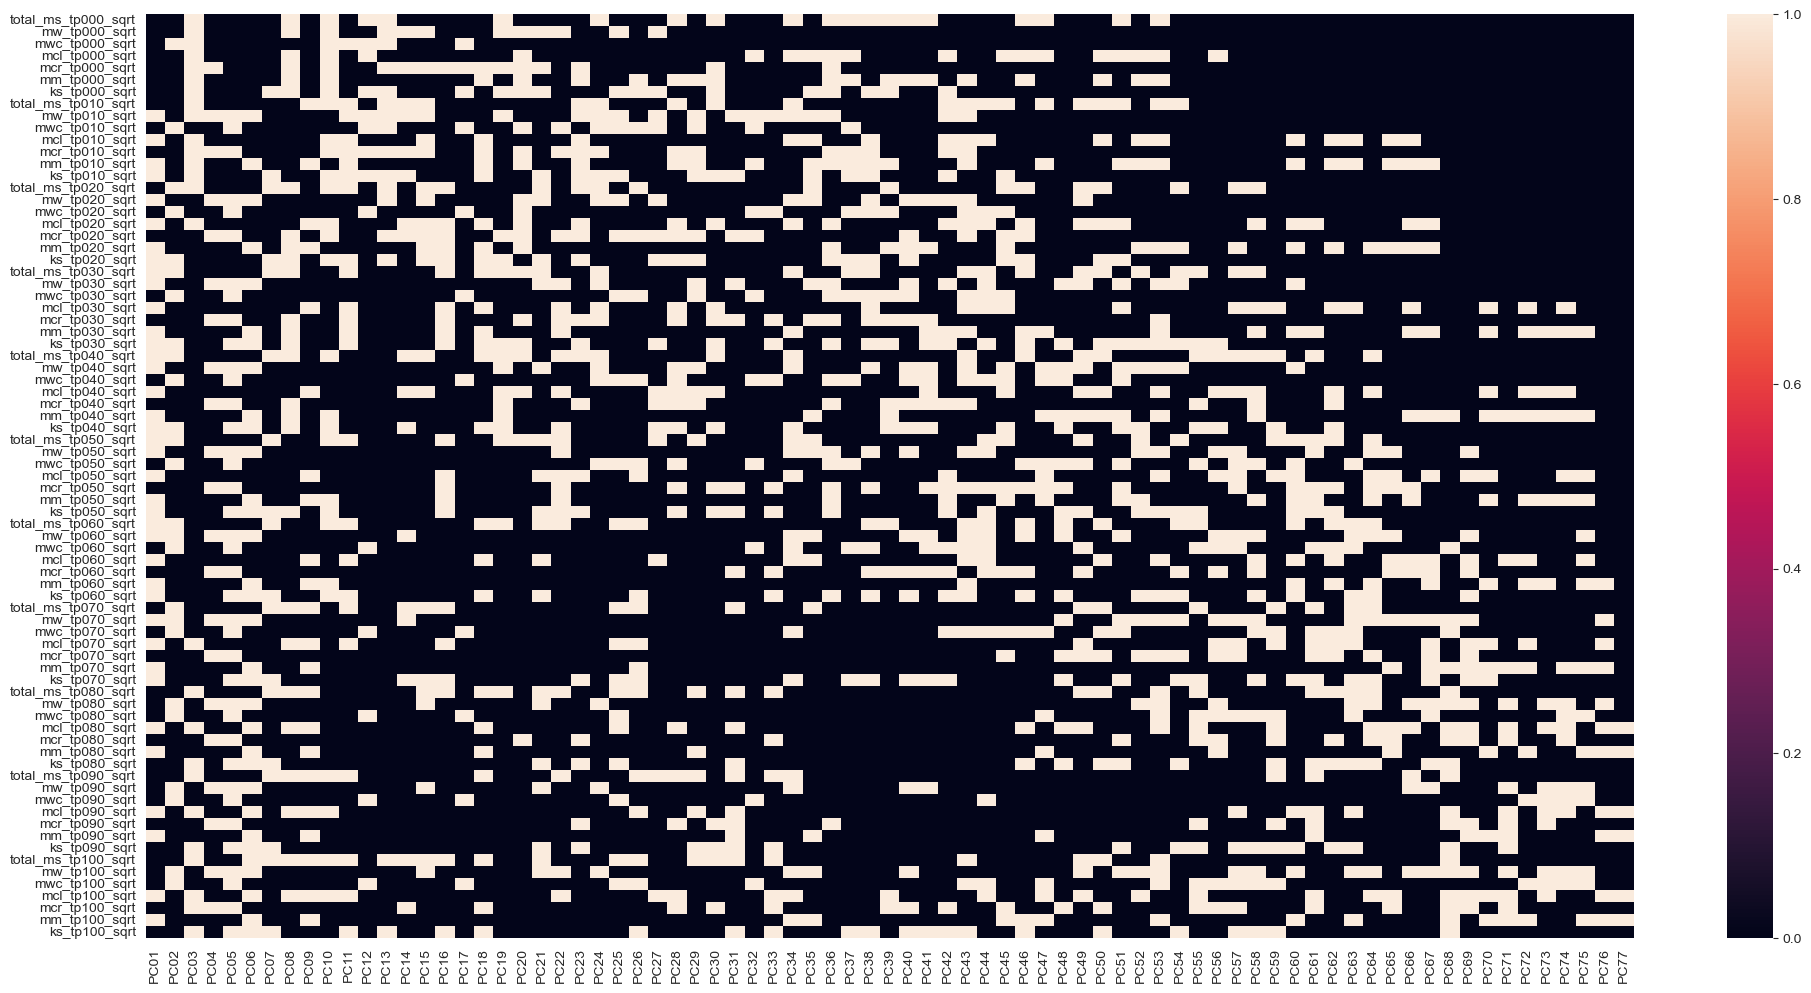

In [134]:
fig, ax = plt.subplots(figsize=(24, 12))

sns.heatmap( data = np.transpose( calc_pca_contrib( pca_object.components_) ) > (1 / timepoint_pcs.shape[1]), 
            xticklabels=pc_scores_df.iloc[:, :len(feature_names)].columns.tolist(),
            yticklabels=feature_names,
            vmin=0, vmax=1)

plt.savefig('s3_pc_contrib.png')
plt.show()

In [135]:
select_sess_df.sid.unique()

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  14,  15,
        16,  17,  18,  19,  20,  23,  24,  25,  27,  28,  29,  30,  31,
        32,  34,  35,  36,  38,  39,  41,  42,  43,  44,  45,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  59,  61,  63,  66,  67,
        68,  69,  70,  72,  73,  74,  75,  76,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        97,  98,  99, 100, 101, 102, 105, 106])

In [136]:
select_sess_df.actv_grp.unique()

array(['Aulaweb', 'Blank', 'Deeds', 'Diagram', 'Other', 'Properties',
       'Study', 'TextEditor', 'FSM_Related', 'Study_Materials'],
      dtype=object)

In [137]:
input_grid = pd.DataFrame([ (xs,xag,xa0,xb0,xc0,xd0,xe0,xf0,xg0,xa1,xb1,xc1,xd1,xe1,xf1,xg1,xa2,xb2,xc2,xd2,xe2,xf2,xg2,xa3,xb3,xc3,xd3,xe3,xf3,xg3,xa4,xb4,xc4,xd4,xe4,xf4,xg4,xa5,xb5,xc5,xd5,xe5,xf5,xg5,xa6,xb6,xc6,xd6,xe6,xf6,xg6,xa7,xb7,xc7,xd7,xe7,xf7,xg7,xa8,xb8,xc8,xd8,xe8,xf8,xg8,xa9,xb9,xc9,xd9,xe9,xf9,xg9,xa10,xb10,xc10,xd10,xe10,xf10,xg10) 
                          for xs in [5,20,41,56,79,93]
                          for xag in ['Aulaweb', 'Deeds', 'Diagram','TextEditor']
                          for xa0 in [select_sess_df.total_ms_tp000_sqrt.median()]
                          for xb0 in [select_sess_df.mw_tp000_sqrt.median()]
                          for xc0 in [select_sess_df.mwc_tp000_sqrt.median()]
                          for xd0 in [select_sess_df.mcl_tp000_sqrt.median()]
                          for xe0 in [select_sess_df.mcr_tp000_sqrt.median()]
                          for xf0 in [select_sess_df.mm_tp000_sqrt.median()]
                          for xg0 in [select_sess_df.ks_tp000_sqrt.median()]
                          for xa1 in [select_sess_df.total_ms_tp010_sqrt.median()]
                          for xb1 in [select_sess_df.mw_tp010_sqrt.median()]
                          for xc1 in [select_sess_df.mwc_tp010_sqrt.median()]
                          for xd1 in [select_sess_df.mcl_tp010_sqrt.median()]
                          for xe1 in [select_sess_df.mcr_tp010_sqrt.median()]
                          for xf1 in [select_sess_df.mm_tp010_sqrt.median()]
                          for xg1 in [select_sess_df.ks_tp010_sqrt.median()]
                          for xa2 in [select_sess_df.total_ms_tp020_sqrt.median()]
                          for xb2 in [select_sess_df.mw_tp020_sqrt.median()]
                          for xc2 in [select_sess_df.mwc_tp020_sqrt.median()]
                          for xd2 in [select_sess_df.mcl_tp020_sqrt.median()]
                          for xe2 in [select_sess_df.mcr_tp020_sqrt.median()]
                          for xf2 in [select_sess_df.mm_tp020_sqrt.median()]
                          for xg2 in [select_sess_df.ks_tp020_sqrt.median()]
                          for xa3 in [select_sess_df.total_ms_tp030_sqrt.median()]
                          for xb3 in [select_sess_df.mw_tp030_sqrt.median()]
                          for xc3 in [select_sess_df.mwc_tp030_sqrt.median()]
                          for xd3 in [select_sess_df.mcl_tp030_sqrt.median()]
                          for xe3 in [select_sess_df.mcr_tp030_sqrt.median()]
                          for xf3 in [select_sess_df.mm_tp030_sqrt.median()]
                          for xg3 in [select_sess_df.ks_tp030_sqrt.median()]
                          for xa4 in [select_sess_df.total_ms_tp040_sqrt.median()]
                          for xb4 in [select_sess_df.mw_tp040_sqrt.median()]
                          for xc4 in [select_sess_df.mwc_tp040_sqrt.median()]
                          for xd4 in [select_sess_df.mcl_tp040_sqrt.median()]
                          for xe4 in [select_sess_df.mcr_tp040_sqrt.median()]
                          for xf4 in [select_sess_df.mm_tp040_sqrt.median()]
                          for xg4 in [select_sess_df.ks_tp040_sqrt.median()]
                          for xa5 in [select_sess_df.total_ms_tp050_sqrt.median()]
                          for xb5 in [select_sess_df.mw_tp050_sqrt.median()]
                          for xc5 in [select_sess_df.mwc_tp050_sqrt.median()]
                          for xd5 in [select_sess_df.mcl_tp050_sqrt.median()]
                          for xe5 in [select_sess_df.mcr_tp050_sqrt.median()]
                          for xf5 in [select_sess_df.mm_tp050_sqrt.median()]
                          for xg5 in [select_sess_df.ks_tp050_sqrt.median()]
                          for xa6 in [select_sess_df.total_ms_tp060_sqrt.median()]
                          for xb6 in [select_sess_df.mw_tp060_sqrt.median()]
                          for xc6 in [select_sess_df.mwc_tp060_sqrt.median()]
                          for xd6 in [select_sess_df.mcl_tp060_sqrt.median()]
                          for xe6 in [select_sess_df.mcr_tp060_sqrt.median()]
                          for xf6 in [select_sess_df.mm_tp060_sqrt.median()]
                          for xg6 in [select_sess_df.ks_tp060_sqrt.median()]
                          for xa7 in [select_sess_df.total_ms_tp070_sqrt.median()]
                          for xb7 in [select_sess_df.mw_tp070_sqrt.median()]
                          for xc7 in [select_sess_df.mwc_tp070_sqrt.median()]
                          for xd7 in [select_sess_df.mcl_tp070_sqrt.median()]
                          for xe7 in [select_sess_df.mcr_tp070_sqrt.median()]
                          for xf7 in [select_sess_df.mm_tp070_sqrt.median()]
                          for xg7 in [select_sess_df.ks_tp070_sqrt.median()]
                          for xa8 in [select_sess_df.total_ms_tp080_sqrt.median()]
                          for xb8 in [select_sess_df.mw_tp080_sqrt.median()]
                          for xc8 in [select_sess_df.mwc_tp080_sqrt.median()]
                          for xd8 in [select_sess_df.mcl_tp080_sqrt.median()]
                          for xe8 in [select_sess_df.mcr_tp080_sqrt.median()]
                          for xf8 in [select_sess_df.mm_tp080_sqrt.median()]
                          for xg8 in [select_sess_df.ks_tp080_sqrt.median()]
                          for xa9 in [select_sess_df.total_ms_tp090_sqrt.median()]
                          for xb9 in [select_sess_df.mw_tp090_sqrt.median()]
                          for xc9 in [select_sess_df.mwc_tp090_sqrt.median()]
                          for xd9 in [select_sess_df.mcl_tp090_sqrt.median()]
                          for xe9 in [select_sess_df.mcr_tp090_sqrt.median()]
                          for xf9 in [select_sess_df.mm_tp090_sqrt.median()]
                          for xg9 in [select_sess_df.ks_tp090_sqrt.median()]
                          for xa10 in [select_sess_df.total_ms_tp100_sqrt.median()]
                          for xb10 in [select_sess_df.mw_tp100_sqrt.median()]
                          for xc10 in [select_sess_df.mwc_tp100_sqrt.median()]
                          for xd10 in [select_sess_df.mcl_tp100_sqrt.median()]
                          for xe10 in [select_sess_df.mcr_tp100_sqrt.median()]
                          for xf10 in np.linspace(select_sess_df.mm_tp100_sqrt.min() - 0.02, select_sess_df.mm_tp100_sqrt.max() + 0.02, num=101)
                          for xg10 in [select_sess_df.ks_tp100_sqrt.median()]], 
                         columns=['sid', 'actv_grp', 'total_ms_tp000_sqrt', 'mw_tp000_sqrt',
       'mwc_tp000_sqrt', 'mcl_tp000_sqrt', 'mcr_tp000_sqrt', 'mm_tp000_sqrt',
       'ks_tp000_sqrt', 'total_ms_tp010_sqrt', 'mw_tp010_sqrt',
       'mwc_tp010_sqrt', 'mcl_tp010_sqrt', 'mcr_tp010_sqrt', 'mm_tp010_sqrt',
       'ks_tp010_sqrt', 'total_ms_tp020_sqrt', 'mw_tp020_sqrt',
       'mwc_tp020_sqrt', 'mcl_tp020_sqrt', 'mcr_tp020_sqrt', 'mm_tp020_sqrt',
       'ks_tp020_sqrt', 'total_ms_tp030_sqrt', 'mw_tp030_sqrt',
       'mwc_tp030_sqrt', 'mcl_tp030_sqrt', 'mcr_tp030_sqrt', 'mm_tp030_sqrt',
       'ks_tp030_sqrt', 'total_ms_tp040_sqrt', 'mw_tp040_sqrt',
       'mwc_tp040_sqrt', 'mcl_tp040_sqrt', 'mcr_tp040_sqrt', 'mm_tp040_sqrt',
       'ks_tp040_sqrt', 'total_ms_tp050_sqrt', 'mw_tp050_sqrt',
       'mwc_tp050_sqrt', 'mcl_tp050_sqrt', 'mcr_tp050_sqrt', 'mm_tp050_sqrt',
       'ks_tp050_sqrt', 'total_ms_tp060_sqrt', 'mw_tp060_sqrt',
       'mwc_tp060_sqrt', 'mcl_tp060_sqrt', 'mcr_tp060_sqrt', 'mm_tp060_sqrt',
       'ks_tp060_sqrt', 'total_ms_tp070_sqrt', 'mw_tp070_sqrt',
       'mwc_tp070_sqrt', 'mcl_tp070_sqrt', 'mcr_tp070_sqrt', 'mm_tp070_sqrt',
       'ks_tp070_sqrt', 'total_ms_tp080_sqrt', 'mw_tp080_sqrt',
       'mwc_tp080_sqrt', 'mcl_tp080_sqrt', 'mcr_tp080_sqrt', 'mm_tp080_sqrt',
       'ks_tp080_sqrt', 'total_ms_tp090_sqrt', 'mw_tp090_sqrt',
       'mwc_tp090_sqrt', 'mcl_tp090_sqrt', 'mcr_tp090_sqrt', 'mm_tp090_sqrt',
       'ks_tp090_sqrt', 'total_ms_tp100_sqrt', 'mw_tp100_sqrt',
       'mwc_tp100_sqrt', 'mcl_tp100_sqrt', 'mcr_tp100_sqrt', 'mm_tp100_sqrt',
       'ks_tp100_sqrt'])

In [138]:
input_grid.shape

(2424, 79)

In [139]:
input_grid.head()

,sid,actv_grp,total_ms_tp000_sqrt,mw_tp000_sqrt,mwc_tp000_sqrt,mcl_tp000_sqrt,mcr_tp000_sqrt,mm_tp000_sqrt,ks_tp000_sqrt,total_ms_tp010_sqrt,...,mcr_tp090_sqrt,mm_tp090_sqrt,ks_tp090_sqrt,total_ms_tp100_sqrt,mw_tp100_sqrt,mwc_tp100_sqrt,mcl_tp100_sqrt,mcr_tp100_sqrt,mm_tp100_sqrt,ks_tp100_sqrt
0,5,Aulaweb,406.20192,0.0,0.0,6.402648,0.0,55.063383,7.211103,1533.622944,...,17.320508,411.197016,63.027771,3042.778281,45.977966,0.0,61.749493,17.720045,24.779194,65.061509
1,5,Aulaweb,406.20192,0.0,0.0,6.402648,0.0,55.063383,7.211103,1533.622944,...,17.320508,411.197016,63.027771,3042.778281,45.977966,0.0,61.749493,17.720045,34.331949,65.061509
2,5,Aulaweb,406.20192,0.0,0.0,6.402648,0.0,55.063383,7.211103,1533.622944,...,17.320508,411.197016,63.027771,3042.778281,45.977966,0.0,61.749493,17.720045,43.884704,65.061509
3,5,Aulaweb,406.20192,0.0,0.0,6.402648,0.0,55.063383,7.211103,1533.622944,...,17.320508,411.197016,63.027771,3042.778281,45.977966,0.0,61.749493,17.720045,53.437459,65.061509
4,5,Aulaweb,406.20192,0.0,0.0,6.402648,0.0,55.063383,7.211103,1533.622944,...,17.320508,411.197016,63.027771,3042.778281,45.977966,0.0,61.749493,17.720045,62.990214,65.061509


In [140]:
select_sess_X.head()

,sid,actv_grp,total_ms_tp000_sqrt,mw_tp000_sqrt,mwc_tp000_sqrt,mcl_tp000_sqrt,mcr_tp000_sqrt,mm_tp000_sqrt,ks_tp000_sqrt,total_ms_tp010_sqrt,...,mcr_tp090_sqrt,mm_tp090_sqrt,ks_tp090_sqrt,total_ms_tp100_sqrt,mw_tp100_sqrt,mwc_tp100_sqrt,mcl_tp100_sqrt,mcr_tp100_sqrt,mm_tp100_sqrt,ks_tp100_sqrt
653,2,Aulaweb,2059.368835,14.628739,0.0,42.166337,10.862780,324.242193,41.121770,2066.784943,...,17.175564,505.788197,67.339439,3129.376935,37.134889,0.0,75.139870,17.435596,514.693112,69.806876
654,2,Blank,89.442719,0.000000,0.0,2.000000,0.000000,22.271057,0.000000,741.080293,...,17.146428,504.451385,67.059675,3107.893177,35.958309,0.0,74.565408,17.262677,509.718550,69.123079
655,2,Deeds,187.082869,2.828427,0.0,3.464102,0.000000,33.570821,0.000000,1090.321054,...,17.146428,506.464411,67.652051,3129.057366,37.134889,0.0,75.113248,17.435596,514.478377,69.806876
656,2,Diagram,2018.910597,14.560220,0.0,41.448764,10.488088,316.633858,36.510273,2056.404629,...,17.378147,512.338755,69.778220,3129.057366,37.134889,0.0,75.099933,17.435596,514.401594,69.806876
657,2,Other,70.710678,0.000000,0.0,1.414214,0.000000,16.248077,0.000000,1159.353268,...,17.492856,515.346679,70.289402,3135.442552,37.134889,0.0,75.246262,17.492856,515.694677,70.349129


In [141]:
input_grid_copy = input_grid.copy()

In [142]:
input_grid_copy['pred_enet_additv_class'] = enet_additv_search_results.predict( input_grid )

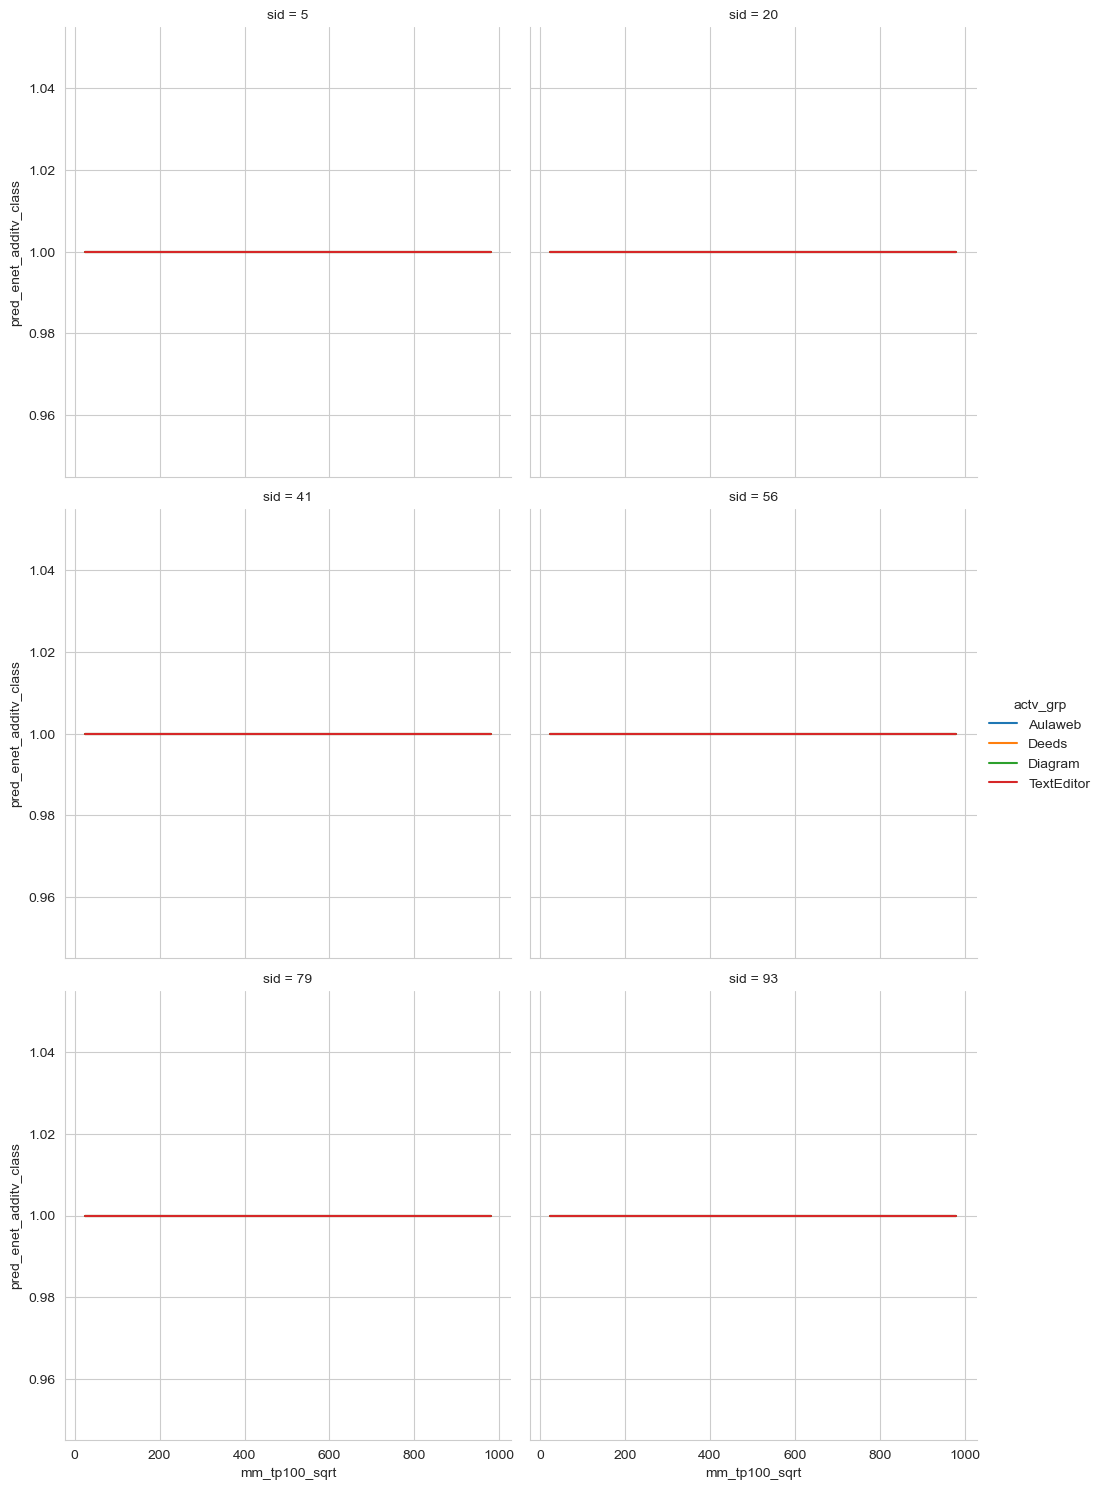

In [143]:
sns.relplot(data = input_grid_copy, x='mm_tp100_sqrt', y='pred_enet_additv_class', hue='actv_grp', 
            col='sid', col_wrap=2, kind='line')

plt.show()

#### Preprocess with Pipelines - include only actv_grp as categorical input

In [144]:
categorical_inputs_b = ['actv_grp']

In [145]:
categorical_transform_b = Pipeline( steps = [ ('dummy', OneHotEncoder(drop='first')) ] )

Use `numeric_transform_pca` from above

In [146]:
complex_transform_b = ColumnTransformer( transformers=[('num', numeric_transform_pca, sqrt_vars),
                                                    ('cat', categorical_transform_b, categorical_inputs_b)])

In [147]:
complex_transform_b.transformers

[('num',
  Pipeline(steps=[('std_input', StandardScaler()), ('pca', PCA(n_components=12)),
                  ('std_features', StandardScaler())]),
  ['total_ms_tp000_sqrt',
   'mw_tp000_sqrt',
   'mwc_tp000_sqrt',
   'mcl_tp000_sqrt',
   'mcr_tp000_sqrt',
   'mm_tp000_sqrt',
   'ks_tp000_sqrt',
   'total_ms_tp010_sqrt',
   'mw_tp010_sqrt',
   'mwc_tp010_sqrt',
   'mcl_tp010_sqrt',
   'mcr_tp010_sqrt',
   'mm_tp010_sqrt',
   'ks_tp010_sqrt',
   'total_ms_tp020_sqrt',
   'mw_tp020_sqrt',
   'mwc_tp020_sqrt',
   'mcl_tp020_sqrt',
   'mcr_tp020_sqrt',
   'mm_tp020_sqrt',
   'ks_tp020_sqrt',
   'total_ms_tp030_sqrt',
   'mw_tp030_sqrt',
   'mwc_tp030_sqrt',
   'mcl_tp030_sqrt',
   'mcr_tp030_sqrt',
   'mm_tp030_sqrt',
   'ks_tp030_sqrt',
   'total_ms_tp040_sqrt',
   'mw_tp040_sqrt',
   'mwc_tp040_sqrt',
   'mcl_tp040_sqrt',
   'mcr_tp040_sqrt',
   'mm_tp040_sqrt',
   'ks_tp040_sqrt',
   'total_ms_tp050_sqrt',
   'mw_tp050_sqrt',
   'mwc_tp050_sqrt',
   'mcl_tp050_sqrt',
   'mcr_tp050_sqrt',

In [148]:
interact_transform = Pipeline( steps=[ ('prepro', complex_transform_b),
                                          ('make_poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False))])


In [149]:
interact_transform.fit_transform(select_sess_df).shape

(684, 231)

In [150]:
select_sess_X_b = select_sess_df.drop(columns=['sess','sid','interim_pass']).copy()

In [151]:
select_sess_X.shape

(684, 79)

In [152]:
select_sess_X_b.shape

(684, 78)

In [153]:
select_sess_X_b.actv_grp.unique()

array(['Aulaweb', 'Blank', 'Deeds', 'Diagram', 'Other', 'Properties',
       'Study', 'TextEditor', 'FSM_Related', 'Study_Materials'],
      dtype=object)

In [154]:
len(select_sess_X_b.actv_grp.unique())

10

In [155]:
select_sess_df.interim_pass.value_counts()

1.0    399
0.0    285
Name: interim_pass, dtype: int64

Use same `select_sess_y` as above

In [156]:
interact_transform.fit_transform( select_sess_X_b ).shape

(684, 231)

#### Fit model with Elastic Net and Pipelines

Use `enet_to_fit`, `enet_grid`, and `my_cv` from above

In [157]:
enet_interact_wflow = Pipeline( steps = [('prepro', interact_transform),
                                      ('enet', enet_to_fit)] )

In [158]:
enet_interact_search = GridSearchCV( enet_interact_wflow, enet_grid, cv=my_cv)

In [159]:
enet_interact_search_results = enet_interact_search.fit(select_sess_X_b, select_sess_y)

In [160]:
enet_interact_search_results.best_params_

{'enet__C': 0.09071795328941247, 'enet__l1_ratio': 0.25}

In [161]:
enet_interact_search_results.best_score_

0.852361528553027

In [162]:
enet_interact_search_results.best_estimator_.named_steps['enet'].coef_

array([[-0.99568765, -0.00117056, -0.60305759,  0.27520886, -0.0533723 ,
         0.22949601, -0.90479439,  0.01257915, -0.18802707,  0.19718861,
        -0.27377263,  0.29851809,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.06123962,  0.26603149, -0.31558159, -0.03139083,
        -0.26918984, -0.393452  ,  0.20288697,  0.33194558, -0.27483153,
         0.1313263 ,  0.        ,  0.        ,  0.        , -0.05512202,
         0.        ,  0.        ,  0.04287527, -0.20251278,  0.        ,
         0.        ,  0.21296741,  0.29859898,  0.15593914,  0.01785055,
         0.014245  ,  0.        ,  0.        ,  0.        , -0.08858999,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.01477685, -0.00900938,  0.        ,  0.        ,
         0.14779542,  0.15749979, -0.33605648, -0.06916644,  0.        ,
         0.        ,  0.16302192,  0.14095135, -0.0

In [163]:
enet_interact_search_results.best_estimator_.named_steps['enet'].coef_.shape

(1, 231)

In [164]:
enet_interact_search_results.best_estimator_.named_steps['enet'].coef_[enet_interact_search_results.best_estimator_.named_steps['enet'].coef_ != 0].size

83

In [165]:
input_grid_b = pd.DataFrame([ (xag,xa0,xb0,xc0,xd0,xe0,xf0,xg0,xa1,xb1,xc1,xd1,xe1,xf1,xg1,xa2,xb2,xc2,xd2,xe2,xf2,xg2,xa3,xb3,xc3,xd3,xe3,xf3,xg3,xa4,xb4,xc4,xd4,xe4,xf4,xg4,xa5,xb5,xc5,xd5,xe5,xf5,xg5,xa6,xb6,xc6,xd6,xe6,xf6,xg6,xa7,xb7,xc7,xd7,xe7,xf7,xg7,xa8,xb8,xc8,xd8,xe8,xf8,xg8,xa9,xb9,xc9,xd9,xe9,xf9,xg9,xa10,xb10,xc10,xd10,xe10,xf10,xg10) 
                          for xag in select_sess_df.actv_grp.unique()
                          for xa0 in [select_sess_df.total_ms_tp000_sqrt.median()]
                          for xb0 in [select_sess_df.mw_tp000_sqrt.median()]
                          for xc0 in [select_sess_df.mwc_tp000_sqrt.median()]
                          for xd0 in [select_sess_df.mcl_tp000_sqrt.median()]
                          for xe0 in [select_sess_df.mcr_tp000_sqrt.median()]
                          for xf0 in [select_sess_df.mm_tp000_sqrt.median()]
                          for xg0 in [select_sess_df.ks_tp000_sqrt.median()]
                          for xa1 in [select_sess_df.total_ms_tp010_sqrt.median()]
                          for xb1 in [select_sess_df.mw_tp010_sqrt.median()]
                          for xc1 in [select_sess_df.mwc_tp010_sqrt.median()]
                          for xd1 in [select_sess_df.mcl_tp010_sqrt.median()]
                          for xe1 in [select_sess_df.mcr_tp010_sqrt.median()]
                          for xf1 in [select_sess_df.mm_tp010_sqrt.median()]
                          for xg1 in [select_sess_df.ks_tp010_sqrt.median()]
                          for xa2 in [select_sess_df.total_ms_tp020_sqrt.median()]
                          for xb2 in [select_sess_df.mw_tp020_sqrt.median()]
                          for xc2 in [select_sess_df.mwc_tp020_sqrt.median()]
                          for xd2 in [select_sess_df.mcl_tp020_sqrt.median()]
                          for xe2 in [select_sess_df.mcr_tp020_sqrt.median()]
                          for xf2 in [select_sess_df.mm_tp020_sqrt.median()]
                          for xg2 in [select_sess_df.ks_tp020_sqrt.median()]
                          for xa3 in [select_sess_df.total_ms_tp030_sqrt.median()]
                          for xb3 in [select_sess_df.mw_tp030_sqrt.median()]
                          for xc3 in [select_sess_df.mwc_tp030_sqrt.median()]
                          for xd3 in [select_sess_df.mcl_tp030_sqrt.median()]
                          for xe3 in [select_sess_df.mcr_tp030_sqrt.median()]
                          for xf3 in [select_sess_df.mm_tp030_sqrt.median()]
                          for xg3 in [select_sess_df.ks_tp030_sqrt.median()]
                          for xa4 in [select_sess_df.total_ms_tp040_sqrt.median()]
                          for xb4 in [select_sess_df.mw_tp040_sqrt.median()]
                          for xc4 in [select_sess_df.mwc_tp040_sqrt.median()]
                          for xd4 in [select_sess_df.mcl_tp040_sqrt.median()]
                          for xe4 in [select_sess_df.mcr_tp040_sqrt.median()]
                          for xf4 in [select_sess_df.mm_tp040_sqrt.median()]
                          for xg4 in [select_sess_df.ks_tp040_sqrt.median()]
                          for xa5 in [select_sess_df.total_ms_tp050_sqrt.median()]
                          for xb5 in [select_sess_df.mw_tp050_sqrt.median()]
                          for xc5 in [select_sess_df.mwc_tp050_sqrt.median()]
                          for xd5 in [select_sess_df.mcl_tp050_sqrt.median()]
                          for xe5 in [select_sess_df.mcr_tp050_sqrt.median()]
                          for xf5 in [select_sess_df.mm_tp050_sqrt.median()]
                          for xg5 in [select_sess_df.ks_tp050_sqrt.median()]
                          for xa6 in [select_sess_df.total_ms_tp060_sqrt.median()]
                          for xb6 in [select_sess_df.mw_tp060_sqrt.median()]
                          for xc6 in [select_sess_df.mwc_tp060_sqrt.median()]
                          for xd6 in [select_sess_df.mcl_tp060_sqrt.median()]
                          for xe6 in [select_sess_df.mcr_tp060_sqrt.median()]
                          for xf6 in [select_sess_df.mm_tp060_sqrt.median()]
                          for xg6 in [select_sess_df.ks_tp060_sqrt.median()]
                          for xa7 in [select_sess_df.total_ms_tp070_sqrt.median()]
                          for xb7 in [select_sess_df.mw_tp070_sqrt.median()]
                          for xc7 in [select_sess_df.mwc_tp070_sqrt.median()]
                          for xd7 in [select_sess_df.mcl_tp070_sqrt.median()]
                          for xe7 in [select_sess_df.mcr_tp070_sqrt.median()]
                          for xf7 in [select_sess_df.mm_tp070_sqrt.median()]
                          for xg7 in [select_sess_df.ks_tp070_sqrt.median()]
                          for xa8 in [select_sess_df.total_ms_tp080_sqrt.median()]
                          for xb8 in [select_sess_df.mw_tp080_sqrt.median()]
                          for xc8 in [select_sess_df.mwc_tp080_sqrt.median()]
                          for xd8 in [select_sess_df.mcl_tp080_sqrt.median()]
                          for xe8 in [select_sess_df.mcr_tp080_sqrt.median()]
                          for xf8 in [select_sess_df.mm_tp080_sqrt.median()]
                          for xg8 in [select_sess_df.ks_tp080_sqrt.median()]
                          for xa9 in [select_sess_df.total_ms_tp090_sqrt.median()]
                          for xb9 in [select_sess_df.mw_tp090_sqrt.median()]
                          for xc9 in [select_sess_df.mwc_tp090_sqrt.median()]
                          for xd9 in [select_sess_df.mcl_tp090_sqrt.median()]
                          for xe9 in [select_sess_df.mcr_tp090_sqrt.median()]
                          for xf9 in [select_sess_df.mm_tp090_sqrt.median()]
                          for xg9 in [select_sess_df.ks_tp090_sqrt.median()]
                          for xa10 in [select_sess_df.total_ms_tp100_sqrt.median()]
                          for xb10 in [select_sess_df.mw_tp100_sqrt.median()]
                          for xc10 in [select_sess_df.mwc_tp100_sqrt.median()]
                          for xd10 in [select_sess_df.mcl_tp100_sqrt.median()]
                          for xe10 in [select_sess_df.mcr_tp100_sqrt.median()]
                          for xf10 in np.linspace(select_sess_df.mm_tp100_sqrt.min() - 0.02, select_sess_df.mm_tp100_sqrt.max() + 0.02, num=101)
                          for xg10 in [select_sess_df.ks_tp100_sqrt.median()]], 
                         columns=['actv_grp', 'total_ms_tp000_sqrt', 'mw_tp000_sqrt',
       'mwc_tp000_sqrt', 'mcl_tp000_sqrt', 'mcr_tp000_sqrt', 'mm_tp000_sqrt',
       'ks_tp000_sqrt', 'total_ms_tp010_sqrt', 'mw_tp010_sqrt',
       'mwc_tp010_sqrt', 'mcl_tp010_sqrt', 'mcr_tp010_sqrt', 'mm_tp010_sqrt',
       'ks_tp010_sqrt', 'total_ms_tp020_sqrt', 'mw_tp020_sqrt',
       'mwc_tp020_sqrt', 'mcl_tp020_sqrt', 'mcr_tp020_sqrt', 'mm_tp020_sqrt',
       'ks_tp020_sqrt', 'total_ms_tp030_sqrt', 'mw_tp030_sqrt',
       'mwc_tp030_sqrt', 'mcl_tp030_sqrt', 'mcr_tp030_sqrt', 'mm_tp030_sqrt',
       'ks_tp030_sqrt', 'total_ms_tp040_sqrt', 'mw_tp040_sqrt',
       'mwc_tp040_sqrt', 'mcl_tp040_sqrt', 'mcr_tp040_sqrt', 'mm_tp040_sqrt',
       'ks_tp040_sqrt', 'total_ms_tp050_sqrt', 'mw_tp050_sqrt',
       'mwc_tp050_sqrt', 'mcl_tp050_sqrt', 'mcr_tp050_sqrt', 'mm_tp050_sqrt',
       'ks_tp050_sqrt', 'total_ms_tp060_sqrt', 'mw_tp060_sqrt',
       'mwc_tp060_sqrt', 'mcl_tp060_sqrt', 'mcr_tp060_sqrt', 'mm_tp060_sqrt',
       'ks_tp060_sqrt', 'total_ms_tp070_sqrt', 'mw_tp070_sqrt',
       'mwc_tp070_sqrt', 'mcl_tp070_sqrt', 'mcr_tp070_sqrt', 'mm_tp070_sqrt',
       'ks_tp070_sqrt', 'total_ms_tp080_sqrt', 'mw_tp080_sqrt',
       'mwc_tp080_sqrt', 'mcl_tp080_sqrt', 'mcr_tp080_sqrt', 'mm_tp080_sqrt',
       'ks_tp080_sqrt', 'total_ms_tp090_sqrt', 'mw_tp090_sqrt',
       'mwc_tp090_sqrt', 'mcl_tp090_sqrt', 'mcr_tp090_sqrt', 'mm_tp090_sqrt',
       'ks_tp090_sqrt', 'total_ms_tp100_sqrt', 'mw_tp100_sqrt',
       'mwc_tp100_sqrt', 'mcl_tp100_sqrt', 'mcr_tp100_sqrt', 'mm_tp100_sqrt',
       'ks_tp100_sqrt'])

In [166]:
input_grid_b_copy = input_grid_b.copy()

In [167]:
input_grid_b_copy['pred_enet_interact_class'] = enet_interact_search_results.predict( input_grid_b )

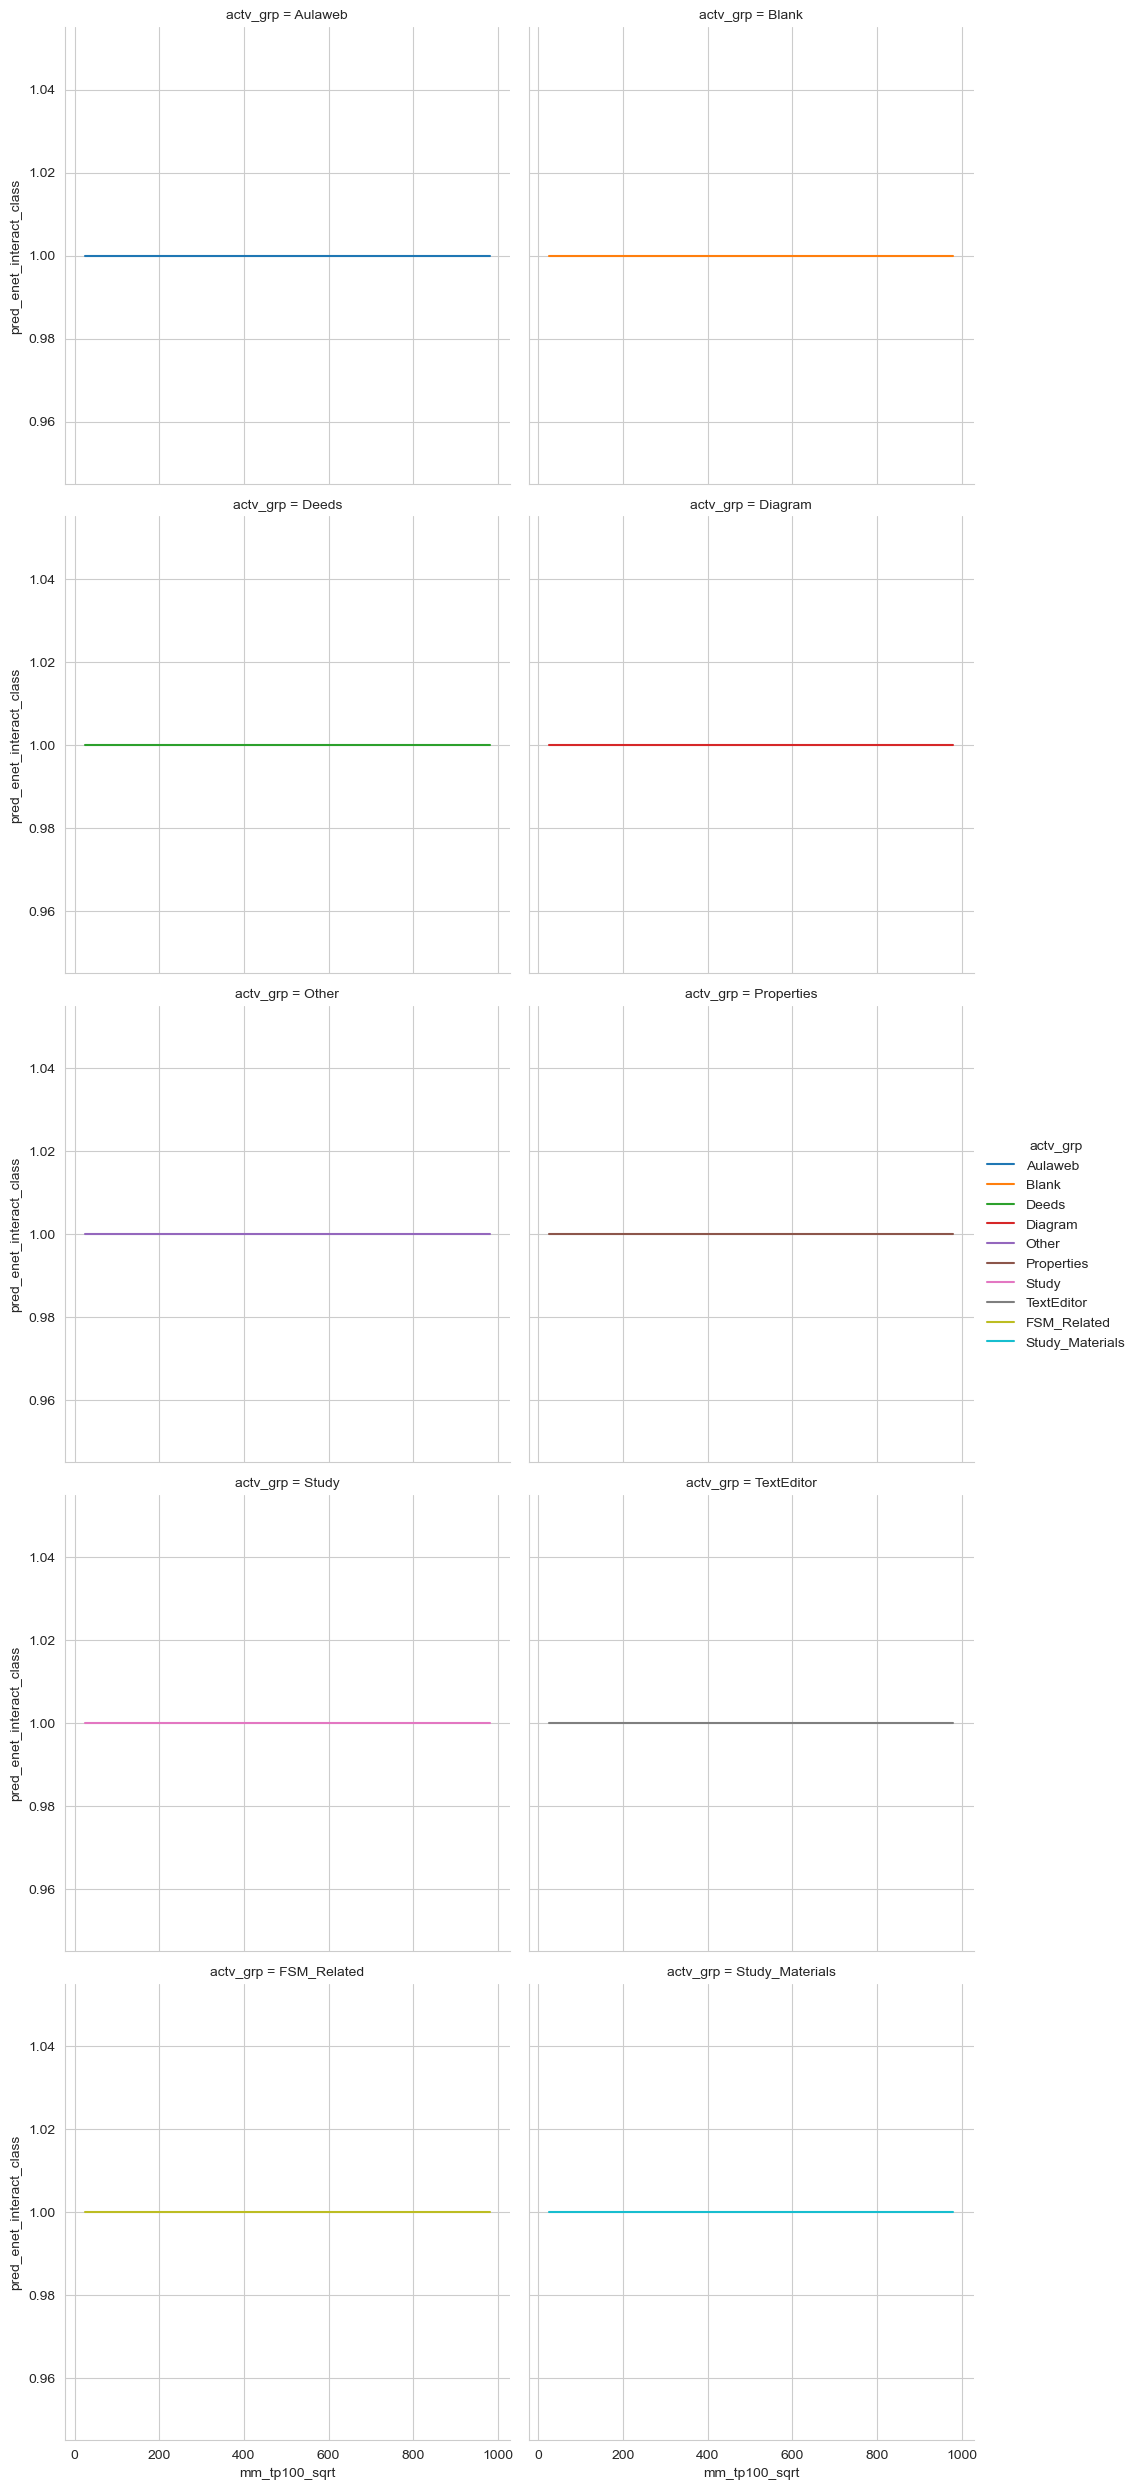

In [168]:
sns.relplot(data = input_grid_b_copy, x='mm_tp100_sqrt', y='pred_enet_interact_class', 
            col='actv_grp', col_wrap=2, hue='actv_grp', kind='line')

plt.show()

##### Save data for comparison

In [169]:
s3_pc_scores_12_df = pc_scores_12_df.copy()

In [170]:
%store s3_pc_scores_12_df

Stored 's3_pc_scores_12_df' (DataFrame)


In [171]:
s3_pc_scores_outp_df = pc_scores_outp_df.copy()

In [172]:
%store s3_pc_scores_outp_df

Stored 's3_pc_scores_outp_df' (DataFrame)


In [173]:
s3_additv_sid_model_coef = enet_additv_search_results.best_estimator_.named_steps['enet'].coef_

In [174]:
%store s3_additv_sid_model_coef

Stored 's3_additv_sid_model_coef' (ndarray)


In [175]:
s3_interact_nosid_model_coef = enet_interact_search_results.best_estimator_.named_steps['enet'].coef_

In [176]:
%store s3_interact_nosid_model_coef

Stored 's3_interact_nosid_model_coef' (ndarray)


In [177]:
s3_additv_sid_model_params = enet_additv_search_results.best_params_

In [178]:
%store s3_additv_sid_model_params

Stored 's3_additv_sid_model_params' (dict)


In [179]:
s3_interact_nosid_model_params = enet_interact_search_results.best_params_

In [180]:
%store s3_interact_nosid_model_params

Stored 's3_interact_nosid_model_params' (dict)


In [181]:
s3_additv_sid_model_score = enet_additv_search_results.best_score_

In [182]:
%store s3_additv_sid_model_score

Stored 's3_additv_sid_model_score' (float64)


In [183]:
s3_interact_nosid_model_score = enet_interact_search_results.best_score_

In [184]:
%store s3_interact_nosid_model_score

Stored 's3_interact_nosid_model_score' (float64)


In [185]:
s3_input_grid_copy = input_grid_copy.copy()

In [186]:
%store s3_input_grid_copy

Stored 's3_input_grid_copy' (DataFrame)


In [187]:
s3_input_grid_b_copy = input_grid_b_copy.copy()

In [188]:
%store s3_input_grid_b_copy

Stored 's3_input_grid_b_copy' (DataFrame)
